In [493]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))


In [319]:
ls

#292_folium_chloropleth_USA1.html  states.json
Archive/                           style-notebook.css
Fatal Shooting - Capstone 1.ipynb  style-table.css
final.csv                          top_off_cities.csv
police-shooting.html               top_off_state.csv
state_circum


In [494]:
#shooting = pd.read_csv('fatal-police-shootings-correction.csv', index_col = None ,
                               #  encoding = 'ISO-8859-1' )
#income = pd.read_csv('MedianHouseholdIncome2015-Corrected.csv', index_col = None ,
                               #  encoding = 'ISO-8859-1' )
#education = pd.read_csv('PercentOver25CompletedHighSchool-Correction.csv', index_col = None ,
                                # encoding = 'ISO-8859-1' )
#poverty = pd.read_csv('PercentagePeopleBelowPovertyLevel-Correction.csv', index_col = None ,
                                # encoding = 'ISO-8859-1' )
#race = pd.read_csv('ShareRaceByCity-correction.csv', index_col = None ,
                                # encoding = 'ISO-8859-1' )
circum = pd.read_csv('state_circum.csv', index_col = None ,
                                 encoding = 'ISO-8859-1' )
shooting = pd.read_csv('final.csv', index_col = None ,
                                 encoding = 'ISO-8859-1')
top_off_cities = pd.read_csv('top_off_cities.csv')
top_off_state = pd.read_csv('top_off_state.csv')

In [333]:
#circum = pd.merge(education, income , how = 'left' , on = ['Geographic Area' , 'City'])
#circum = pd.merge(circum , poverty , how = 'left' , on = ['Geographic Area' , 'City'])
#circum = pd.merge(circum , race , how = 'left' , on = ['Geographic Area' , 'City'])

In [402]:
circum.head()
#del circum['Unnamed: 0']
#circum.to_csv('state_circum.csv', index = False)

,index,state,poverty_rate,Median Income,percent_completed_hs,no_victims
0,0,AK,19.85,52099.59,84.63,28
1,1,AL,20.65,40577.31,80.30,106
2,2,AR,22.96,35593.41,79.95,58
3,3,AZ,25.67,42495.67,80.47,246
4,4,CA,17.12,62652.87,81.96,836


In [468]:
shooting.head()

,Unnamed: 0,name,date,manner_of_death,Armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,Age_range,daysofweek,year,poverty_rate,Median Income,percent_completed_hs
0,0,Tim Elliot,2015-01-02,shot,armed,34.0,M,A,Shelton,WA,True,attack,Not fleeing,False,20 - 35,Friday,2015,15.02,59315.28,88.20
1,1,Lewis Lee Lembke,2015-01-02,shot,armed,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,36 - 49,Friday,2015,16.52,48088.07,88.30
2,2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,20 - 35,Saturday,2015,14.76,45160.01,88.23
3,3,Matthew Hoffman,2015-01-04,shot,armed,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,20 - 35,Sunday,2015,17.12,62652.87,81.96
4,4,Michael Rodriguez,2015-01-04,shot,armed,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,36 - 49,Sunday,2015,13.36,58857.70,90.11


In [496]:
#shooting.age = shooting.age.astype(int)
#shooting.reset_index()
shooting.head()
del shooting['Unnamed: 0']
#del shooting['Armed1']
#shooting.info()


,name,date,manner_of_death,Armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,Age_range,daysofweek,year,poverty_rate,Median Income,percent_completed_hs
0,Tim Elliot,2015-01-02,shot,armed,34.0,M,A,Shelton,WA,True,attack,Not fleeing,False,20 - 35,Friday,2015,15.02,59315.28,88.20
1,Lewis Lee Lembke,2015-01-02,shot,armed,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,36 - 49,Friday,2015,16.52,48088.07,88.30
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,20 - 35,Saturday,2015,14.76,45160.01,88.23
3,Matthew Hoffman,2015-01-04,shot,armed,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,20 - 35,Sunday,2015,17.12,62652.87,81.96
4,Michael Rodriguez,2015-01-04,shot,armed,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,36 - 49,Sunday,2015,13.36,58857.70,90.11


In [189]:
shooting['age'] = pd.to_numeric(shooting['age'] , errors= 'coerce')

In [17]:
shooting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5194 entries, 0 to 5193
Data columns (total 19 columns):
name                       5194 non-null object
date                       5194 non-null object
manner_of_death            5194 non-null object
Armed                      5194 non-null object
age                        5194 non-null float64
gender                     5193 non-null object
race                       5194 non-null object
city                       5193 non-null object
state                      5194 non-null object
signs_of_mental_illness    5193 non-null object
threat_level               3264 non-null object
flee                       3166 non-null object
body_camera                3264 non-null object
Age_range                  5194 non-null object
daysofweek                 5194 non-null object
year                       5194 non-null int64
poverty_rate               5194 non-null float64
Median Income              5194 non-null float64
percent_completed_hs       

In [4]:
black_average = round(shooting[shooting.race == 'B']['age'].mean())
white_average = round(shooting[shooting.race == 'W']['age'].mean())
Hispanic_average = round(shooting[shooting.race == 'H']['age'].mean())
Asian_average = round(shooting[shooting.race == 'A']['age'].mean())
Native_American_average = round(shooting[shooting.race == 'N']['age'].mean())
Pacific_average = round(shooting[shooting.race == 'P']['age'].mean())
other_average = round(shooting[shooting.race == 'O']['age'].mean())

In [ ]:

shooting.loc[shooting.race == 'B' , 'age'] = shooting.loc[shooting.race == 'B' , 'age'].fillna(black_average)
shooting.loc[shooting.race == 'W' , 'age'] = shooting.loc[shooting.race == 'W' , 'age'].fillna(white_average)
shooting.loc[shooting.race == 'H' , 'age'] = shooting.loc[shooting.race == 'H' , 'age'].fillna(Hispanic_average)
shooting.loc[shooting.race == 'A' , 'age'] = shooting.loc[shooting.race == 'A' , 'age'].fillna(Asian_average)
shooting.loc[shooting.race == 'P' , 'age'] = shooting.loc[shooting.race == 'P' , 'age'].fillna(Pacific_average)
shooting.loc[shooting.race == 'O' , 'age'] = shooting.loc[shooting.race == 'O' , 'age'].fillna(other_average)
shooting.loc[shooting.race == 'N' , 'age'] = shooting.loc[shooting.race == 'N' , 'age'].fillna(Native_American_average)


In [ ]:
"""
better code for filling Age NAs with the mean of each race
"""

shooting.loc[shooting.age == 'Unknown' , 'age'] = np.nan
age_map = shooting[['age' , 'race']].groupby('race').mean()
age_dict = age_map.to_dict()['age']
shooting['age'] = shooting['age'].fillna(shooting['race'].map(age_dict))


In [419]:
shooting['age'].head(5)

0    34.0
1    47.0
2    23.0
3    32.0
4    39.0
Name: age, dtype: float64

In [403]:
age_map = shooting[['age' , 'race']].groupby('race').mean().reset_index()

In [404]:
age_map[age_map.race == 'B']['age'].values[0]

32.65665236051502

In [405]:
age_map

,race,age
0,A,34.000000
1,B,32.656652
2,H,33.137001
3,N,30.746269
4,O,32.000000
5,P,33.066667
6,W,40.153157


In [ ]:
shooting[shooting['age'].isnull()]

In [392]:
def age_range(age):
    if (age < 13):
        return 'Under 12'
    elif (age> 12) & (age < 20):
        return '13 - 19'
    elif (age > 19) & (age < 36):
        return'20 - 35'
    elif (age > 35) & (age < 50):
        return '36 - 49'
    elif (age > 49) & (age < 65):
        return '50 - 64'
    elif (age> 64):
        return 'Over 65'

In [21]:
shooting['date'] = pd.to_datetime(shooting['date'])
#shooting['Age_range'] = shooting['age'].apply(lambda row : age_range(row) )
#shooting = shooting[~(shooting.name == 'TK TK')]
shooting['daysofweek'] = shooting.date.dt.day_name()
shooting['year'] =shooting.date.dt.year

In [472]:
shooting.to_csv('final.csv', index= False)

In [23]:
shooting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5194 entries, 0 to 5193
Data columns (total 19 columns):
name                       5194 non-null object
date                       5194 non-null datetime64[ns]
manner_of_death            5194 non-null object
Armed                      5194 non-null object
age                        5194 non-null float64
gender                     5193 non-null object
race                       5194 non-null object
city                       5193 non-null object
state                      5194 non-null object
signs_of_mental_illness    5193 non-null object
threat_level               3264 non-null object
flee                       3166 non-null object
body_camera                3264 non-null object
Age_range                  5194 non-null object
daysofweek                 5194 non-null object
year                       5194 non-null int64
poverty_rate               5194 non-null float64
Median Income              5194 non-null float64
percent_completed_h

In [24]:
shooting.race.value_counts(dropna=False)

W    2677
B    1398
H     927
A      85
N      67
O      25
P      15
Name: race, dtype: int64

In [12]:
shooting.flee.value_counts()

Not fleeing    2128
Car             516
Foot            406
Other           116
Name: flee, dtype: int64

In [17]:
shooting.Age_range.value_counts(dropna=False)

20 - 35     2568
36 - 49     1426
50 - 64      749
13 - 19      271
Over 65      171
Under 12       9
Name: Age_range, dtype: int64

In [25]:
#shooting['daysofweek'] = shooting.date.dt.day_name()
shooting.daysofweek.value_counts()


Tuesday      802
Friday       767
Wednesday    756
Sunday       752
Thursday     739
Saturday     703
Monday       675
Name: daysofweek, dtype: int64

In [26]:
shooting.head()

,name,date,manner_of_death,Armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,Age_range,daysofweek,year,poverty_rate,Median Income,percent_completed_hs
0,Tim Elliot,2015-01-02,shot,armed,34.0,M,A,Shelton,WA,True,attack,Not fleeing,False,20 - 35,Friday,2015,15.02,59315.28,88.20
1,Lewis Lee Lembke,2015-01-02,shot,armed,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,36 - 49,Friday,2015,16.52,48088.07,88.30
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,20 - 35,Saturday,2015,14.76,45160.01,88.23
3,Matthew Hoffman,2015-01-04,shot,armed,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,20 - 35,Sunday,2015,17.12,62652.87,81.96
4,Michael Rodriguez,2015-01-04,shot,armed,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,36 - 49,Sunday,2015,13.36,58857.70,90.11


In [27]:
shooting['date'] = pd.to_datetime(shooting['date'])
shooting.date.dt.year.value_counts()

2015    994
2014    984
2017    952
2016    952
2013    946
2018    366
Name: date, dtype: int64

In [28]:
shooting.groupby(shooting.date.dt.year)['gender'].value_counts()

date  gender
2013  M         896
      F          50
2014  M         922
      F          62
2015  M         952
      F          42
2016  M         913
      F          39
2017  M         908
      F          43
2018  M         351
      F          15
Name: gender, dtype: int64

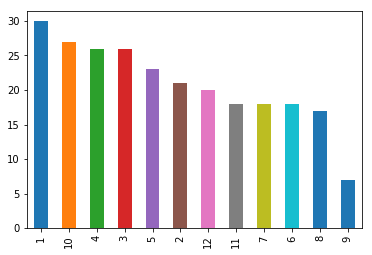

In [30]:
female = shooting[shooting.gender == 'F']
l = female.date.dt.month.value_counts().plot(kind = 'bar')
#female.groupby(shooting.date.dt.month).value_counts().plot(kind = 'bar')

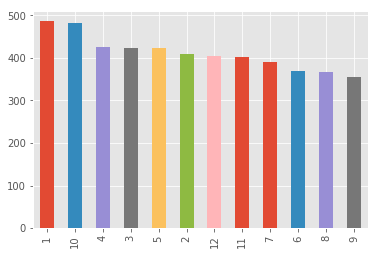

In [473]:
l = male.date.dt.month.value_counts().plot(kind = 'bar')
ll = female.date.dt.month.value_counts().plot(kind = 'bar')

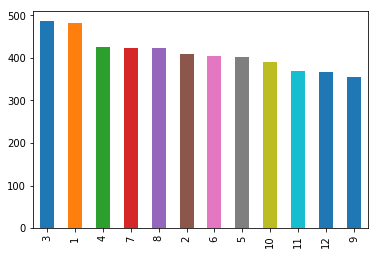

In [31]:
male = shooting[shooting.gender == 'M']
l = male.date.dt.month.value_counts().plot(kind = 'bar')

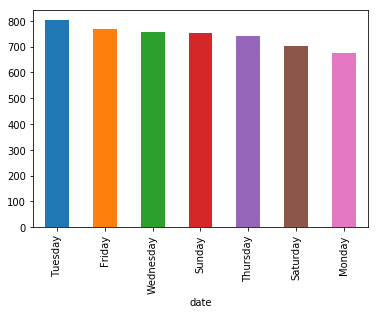

In [32]:
l = shooting.groupby(shooting.date.dt.day_name())['gender'].count().sort_values(ascending = False).plot(kind = 'bar')

In [208]:
female.date.dt.day_name().value_counts()

Tuesday      48
Sunday       42
Friday       37
Thursday     34
Wednesday    34
Saturday     31
Monday       25
Name: date, dtype: int64

In [209]:
male.date.dt.day_name().value_counts()

Tuesday      754
Friday       730
Wednesday    722
Sunday       710
Thursday     705
Saturday     671
Monday       650
Name: date, dtype: int64

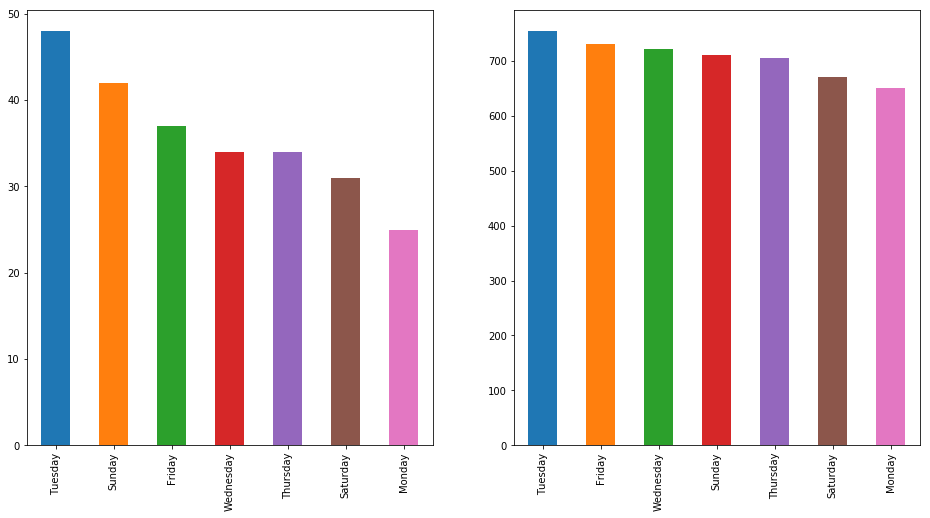

In [33]:
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
female.date.dt.day_name().value_counts().plot(kind = 'bar')
plt.subplot(1,2,2)
male.date.dt.day_name().value_counts().plot(kind = 'bar')

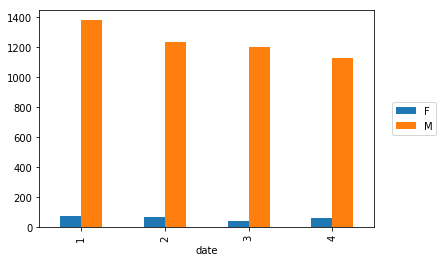

In [96]:
months = shooting.date.dt.month_name()
months.value_counts()
shooting.groupby([ shooting.date.dt.quarter, 'gender'])['year'].count().unstack().plot(kind = 'bar')
plt.legend(loc='center right' , bbox_to_anchor=(1.2, 0.5))

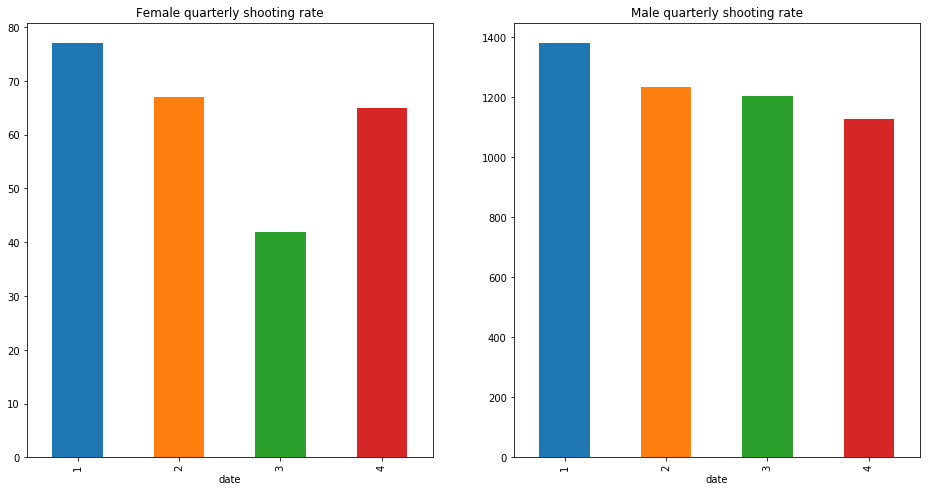

In [38]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
l = female.groupby([female.date.dt.quarter])['year'].count().plot(kind = 'bar')
plt.title('Female quarterly shooting rate')
plt.subplot(1,2,2)
ll = male.groupby(male.date.dt.quarter)['year'].count().plot(kind = 'bar')
m = plt.title('Male quarterly shooting rate')

In [97]:
shooting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5194 entries, 0 to 5193
Data columns (total 17 columns):
Unnamed: 0                 5194 non-null int64
name                       5194 non-null object
date                       5194 non-null datetime64[ns]
manner_of_death            5194 non-null object
Armed                      5194 non-null object
age                        5194 non-null float64
gender                     5193 non-null object
race                       5194 non-null object
city                       5193 non-null object
state                      5194 non-null object
signs_of_mental_illness    5193 non-null object
threat_level               3264 non-null object
flee                       3166 non-null object
body_camera                3264 non-null object
Age_range                  5194 non-null object
daysofweek                 5194 non-null object
year                       5194 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(13)
memory usa

In [98]:
def percentage (part , whole) : 
    return 100 * part / whole


In [107]:
shooting.manner_of_death.value_counts()

shot                            3068
Gunshot                         1927
shot and Tasered                 196
Gunshot, Taser                     2
Gunshot, Taser, Pepper spray       1
Name: manner_of_death, dtype: int64

In [40]:
shooting.Armed.value_counts()

armed           4570
unarmed          439
undetermined     185
Name: Armed, dtype: int64

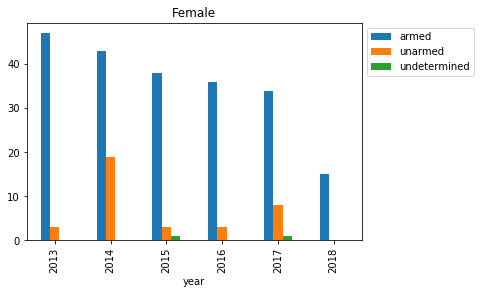

In [81]:
l = female.groupby(['year', 'Armed'])['gender'].count().unstack().plot(kind = 'bar')
l = plt.legend(loc='upper right' , bbox_to_anchor=(1.35, 1))
ll = plt.title('Female')

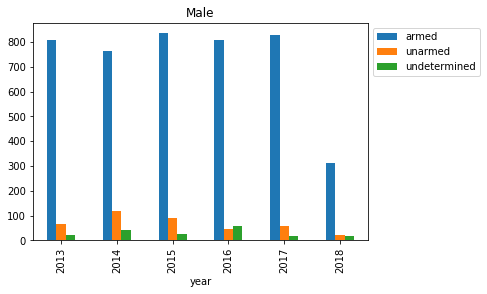

In [82]:
l = male.groupby(['year', 'Armed'])['gender'].count().unstack().plot(kind = 'bar')
l = plt.legend(loc='upper right' , bbox_to_anchor=(1.35, 1))
ll = plt.title('Male')

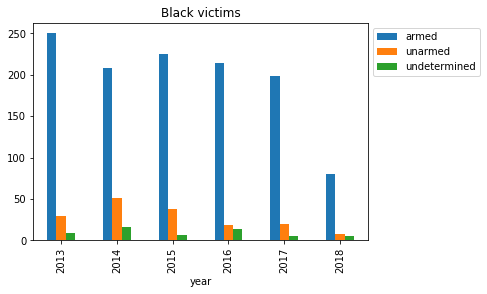

In [88]:
#plt.subplot(nrows = 3,ncols=1)
shooting[shooting.race == 'B'].groupby(['year', 'Armed'])['race'].count().unstack().plot(kind = 'bar')
l = plt.legend(loc='upper right' , bbox_to_anchor=(1.35, 1))
ll = plt.title('Black victims')

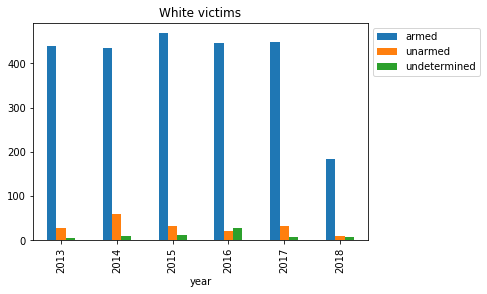

In [89]:
shooting[shooting.race == 'W'].groupby(['year', 'Armed'])['race'].count().unstack().plot(kind = 'bar')
l = plt.legend(loc='upper right' , bbox_to_anchor=(1.35, 1))
ll = plt.title('White victims')

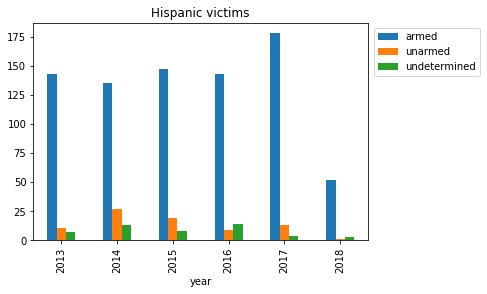

In [90]:
shooting[shooting.race == 'H'].groupby(['year', 'Armed'])['race'].count().unstack().plot(kind = 'bar')
l = plt.legend(loc='upper right' , bbox_to_anchor=(1.35, 1))
ll = plt.title('Hispanic victims')

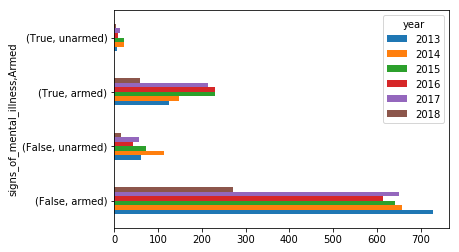

In [92]:
ax = shooting[(shooting.Armed == 'armed') | (shooting.Armed == 'unarmed')].groupby( ['signs_of_mental_illness' , 'Armed'])['year'].value_counts().unstack().plot(kind = 'barh' )


In [113]:
shooting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5194 entries, 0 to 5193
Data columns (total 17 columns):
Unnamed: 0                 5194 non-null int64
name                       5194 non-null object
date                       5194 non-null datetime64[ns]
manner_of_death            5194 non-null object
Armed                      5194 non-null object
age                        5194 non-null float64
gender                     5193 non-null object
race                       5194 non-null object
city                       5193 non-null object
state                      5194 non-null object
signs_of_mental_illness    5193 non-null object
threat_level               3264 non-null object
flee                       3166 non-null object
body_camera                3264 non-null object
Age_range                  5194 non-null object
daysofweek                 5194 non-null object
year                       5194 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(13)
memory usa

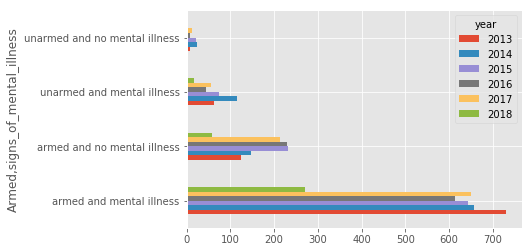

In [476]:
#rows = {'armed and mental illness' , 'armed and no mental illness' , 'unarmed and mental illness' , 'unarmed and no mental illness'}
ax = shooting[(shooting.Armed == 'armed') | (shooting.Armed == 'unarmed')].groupby(['Armed' , 'signs_of_mental_illness' ])['year'].value_counts().unstack().plot(kind = 'barh' )
l = ax.set_yticklabels(['armed and mental illness' , 'armed and no mental illness' , 'unarmed and mental illness' , 'unarmed and no mental illness'])



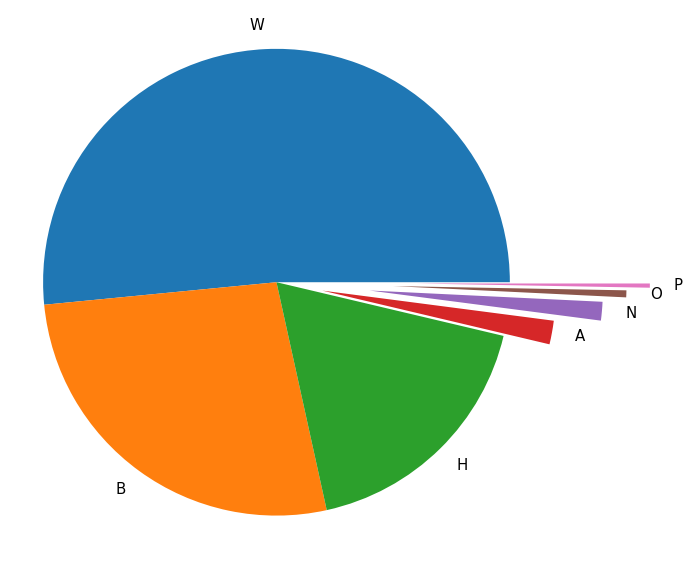

In [341]:
plt.figure(figsize=(12,10))
explode = (0, 0, 0, 0.2, 0.4, 0.5,0.6)
shooting.race.value_counts(dropna=False).plot(kind = 'pie' , explode = explode , fontsize = 15)
plt.axis('equal')
_ = plt.ylabel('')

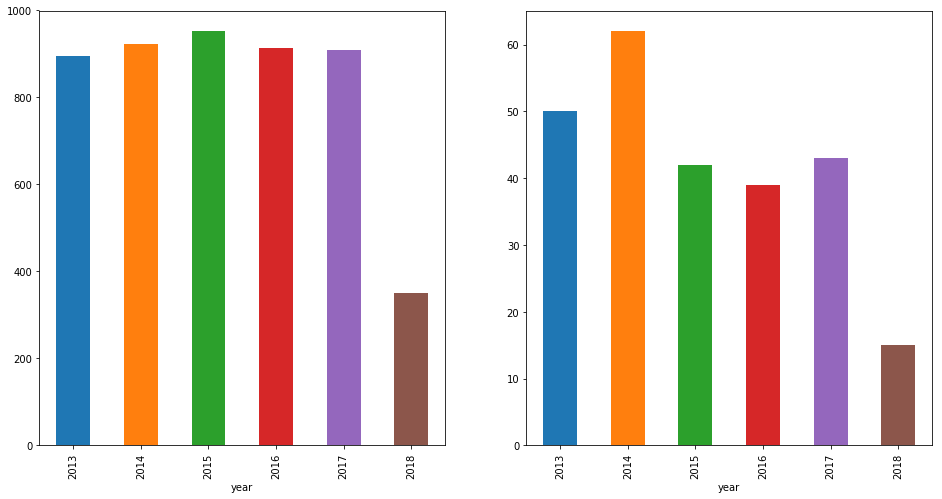

In [349]:
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
male.groupby('year')['name'].count().plot(kind = 'bar')
plt.subplot(1, 2, 2)
female.groupby('year')['name'].count().plot(kind = 'bar')

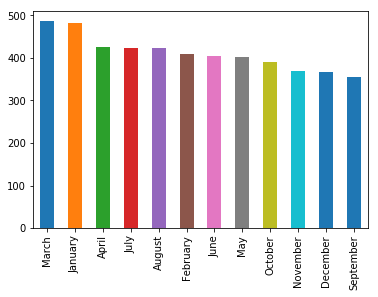

In [77]:
male.date.dt.month_name().value_counts().plot(kind = 'bar')

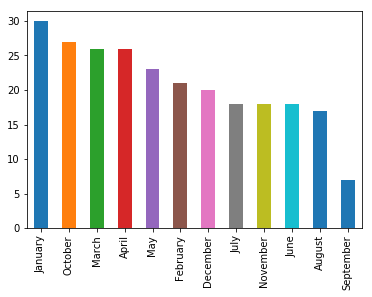

In [212]:
female.date.dt.month_name().value_counts().plot(kind = 'bar')

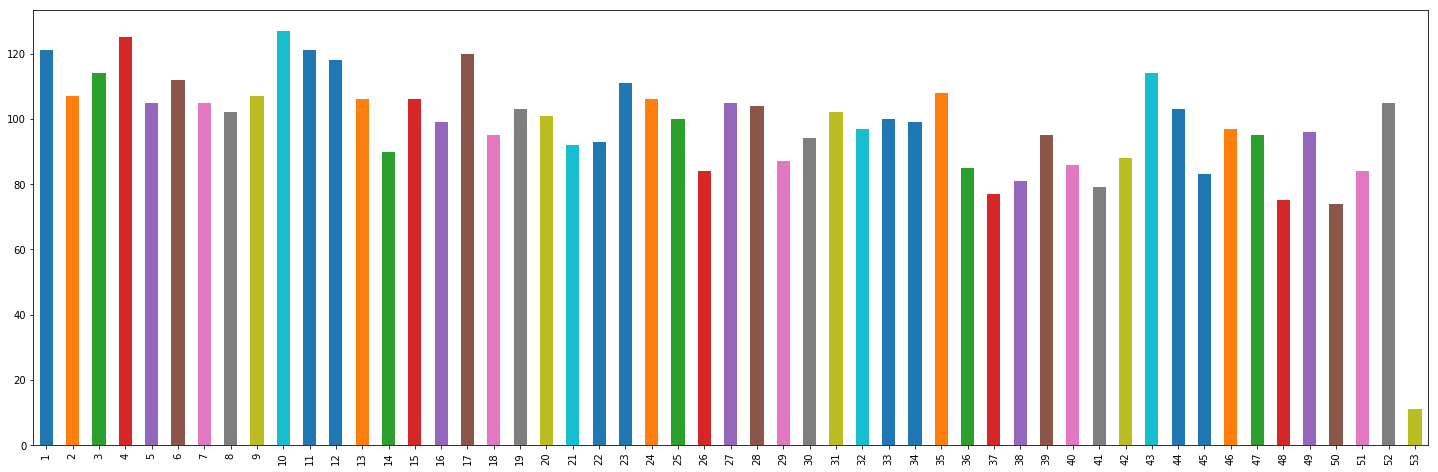

In [213]:
fig = plt.figure(figsize = (25, 8))
shooting.date.dt.week.value_counts().sort_index().plot(kind = 'bar')

In [311]:
shooting.date.dt.is_month_end.value_counts()

False    3255
True       98
Name: date, dtype: int64

In [312]:
shooting.date.dt.is_month_start.value_counts()

False    3247
True      106
Name: date, dtype: int64

In [251]:
shooting[['body_camera' , 'daysofweek','manner_of_death']].groupby(['body_camera' , 'daysofweek']).count()

manner_of_death
body_camera daysofweek                 
False       Friday                  440
            Monday                  381
            Saturday                385
            Sunday                  436
            Thursday                440
            Tuesday                 454
            Wednesday               466
True        Friday                   39
            Monday                   52
            Saturday                 60
            Sunday                   48
            Thursday                 48
            Tuesday                  54
            Wednesday                50

In [214]:
shooting[['body_camera' , 'daysofweek','manner_of_death']].groupby(['body_camera' , 'daysofweek']).count()

manner_of_death
body_camera daysofweek                 
False       Friday                  421
            Monday                  374
            Saturday                377
            Sunday                  424
            Thursday                427
            Tuesday                 443
            Wednesday               451
True        Friday                   39
            Monday                   49
            Saturday                 60
            Sunday                   48
            Thursday                 48
            Tuesday                  54
            Wednesday                49

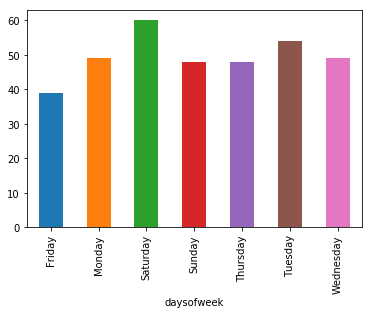

In [281]:
s = shooting[shooting.body_camera == True].groupby('daysofweek')['year'].count().plot(kind = 'bar')

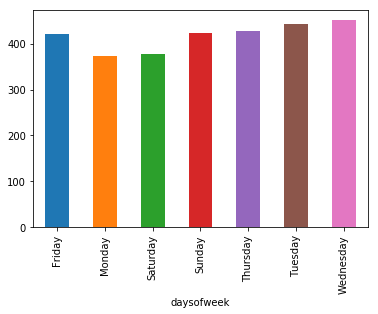

In [280]:
s = shooting[shooting.body_camera == False].groupby('daysofweek')['year'].count().plot(kind = 'bar')

In [98]:
pd.pivot_table(shooting , index=['Age_range' , 'daysofweek' , 'race'], values= 'signs_of_mental_illness' ,aggfunc = 'count')

signs_of_mental_illness
Age_range daysofweek race                         
13 - 19   Friday     B                          13
                     H                           6
                     W                           8
          Monday     B                          20
                     H                           7
                     N                           2
                     W                           8
          Saturday   B                          17
                     H                           6
                     N                           1
                     W                          17
          Sunday     B                          14
                     H                          11
                     W                          12
          Thursday   B                          20
                     H                          12
                     N                           2
                     W                          14
          Tuesday    B                          21
                     H                          15
                     N                           1
                     W                           9
          Wednesday  B                          14
                     H                          11
                     N                           1
                     W                           9
20 - 35   Friday     A                          15
                     B                         115
                     H                          82
                     N                           8
...                                            ...
50 - 64   Wednesday  B                          20
                     H                           7
                     N                           1
                     W                          82
Over 65   Friday     B                           4
                     H                           2
                     W                          14
          Monday     B                           6
                     H                           3
                     W                          17
          Saturday   B                           3
                     H                           3
                     W                          15
          Sunday     B                           2
                     H                           1
                     W                          16
          Thursday   B                           2
                     W                          24
          Tuesday    B                           3
                     H                           2
                     W                          28
          Wednesday  B                           6
                     H                           1
                     W                          18
Under 12  Friday     W                           1
          Monday     B                           1
                     W                           1
          Saturday   B                           1
          Thursday   W                           3
          Tuesday    W                           2

[155 rows x 1 columns]

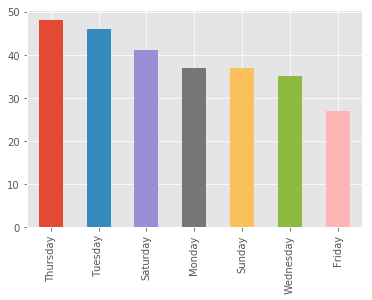

In [490]:
s = shooting[shooting.Age_range == '13 - 19']['daysofweek'].value_counts().plot(kind = 'bar')

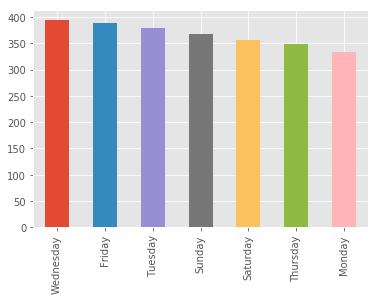

In [491]:
s = shooting[shooting.Age_range == '20 - 35']['daysofweek'].value_counts().plot(kind = 'bar')

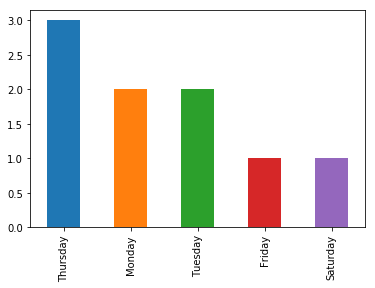

In [278]:
s = shooting[shooting.Age_range == 'Under 12']['daysofweek'].value_counts().plot(kind = 'bar')

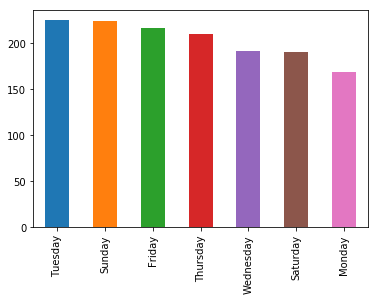

In [277]:
s = shooting[shooting.Age_range == '36 - 49']['daysofweek'].value_counts().plot(kind = 'bar')

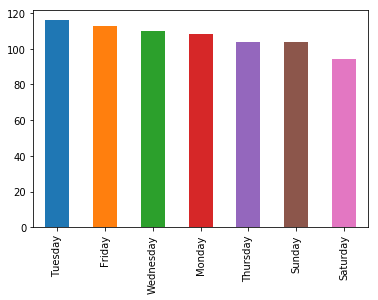

In [276]:
s = shooting[shooting.Age_range == '50 - 64']['daysofweek'].value_counts().plot(kind = 'bar')

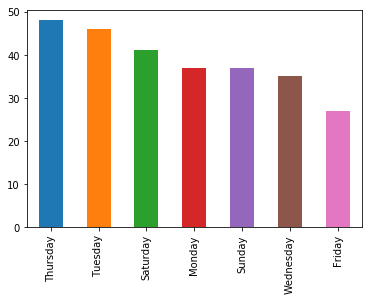

In [275]:
s = shooting[shooting.Age_range == '13 - 19']['daysofweek'].value_counts().plot(kind = 'bar')

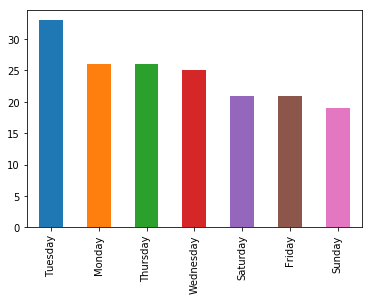

In [274]:
s = shooting[shooting.Age_range == 'Over 65']['daysofweek'].value_counts().plot(kind = 'bar')

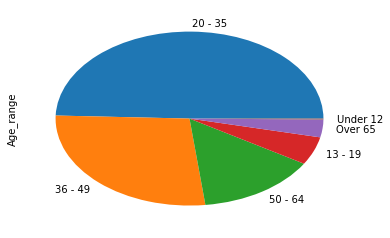

In [126]:
p = shooting['Age_range'].value_counts().plot(kind = 'pie')

In [101]:
shooting.groupby('race').age.describe().sort_values(by = 'count', ascending = False)

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
W,2677.0,40.153157,13.703501,5.0,29.0,38.0,50.0,91.0
B,1398.0,32.656652,12.182259,1.0,24.0,30.0,39.0,107.0
H,927.0,33.137001,10.972851,13.0,25.0,32.0,39.0,80.0
A,85.0,34.000000,0.000000,34.0,34.0,34.0,34.0,34.0
N,67.0,30.746269,9.611141,14.0,24.0,30.0,35.5,61.0
O,25.0,32.000000,0.000000,32.0,32.0,32.0,32.0,32.0
P,15.0,33.066667,10.532037,21.0,25.0,30.0,37.0,61.0


In [109]:
round(shooting.groupby(shooting.date.dt.year).age.mean(), 2)

AttributeError: 'SeriesGroupBy' object has no attribute 'age'

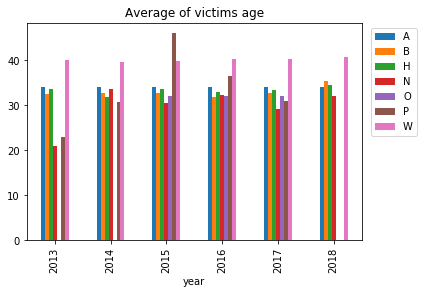

In [135]:

round(shooting.groupby(['year' , 'race'])['age'].mean(), 2).unstack().plot(kind = 'bar')
l = plt.legend(loc='upper right' , bbox_to_anchor=(1.18, 1))
ll = plt.title('Average of victims age')

In [136]:
round(shooting.groupby(['year' , 'race'])['age'].mean(), 2).unstack()

race,A,B,H,N,O,P,W
year,,,,,,,
2013,34.0,32.45,33.66,21.00,NaN,23.00,40.17
2014,34.0,32.70,31.76,33.60,NaN,30.75,39.64
2015,34.0,32.72,33.53,30.44,32.0,46.00,39.96
2016,34.0,31.77,32.93,32.38,32.0,36.50,40.36
2017,34.0,32.64,33.39,29.27,32.0,31.00,40.37
2018,34.0,35.38,34.45,32.14,NaN,NaN,40.85


In [149]:
shooting.groupby(['Age_range' , 'year'])['race'].count().unstack()#.plot(kind = 'bar')

year,2013,2014,2015,2016,2017,2018
Age_range,,,,,,
13 - 19,53.0,54.0,51.0,51.0,52.0,10.0
20 - 35,481.0,489.0,496.0,456.0,477.0,169.0
36 - 49,243.0,265.0,273.0,276.0,248.0,121.0
50 - 64,129.0,139.0,149.0,143.0,141.0,48.0
Over 65,38.0,33.0,24.0,25.0,33.0,18.0
Under 12,2.0,4.0,1.0,1.0,1.0,NaN


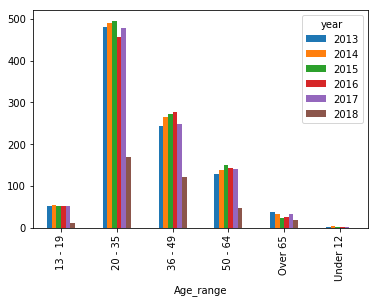

In [152]:
a = shooting.groupby(['Age_range' , 'year'])['race'].count().unstack().plot(kind = 'bar')

In [150]:
shooting.groupby(['race' , 'year'])['Age_range'].count().unstack()#.plot(kind = 'bar')

year,2013,2014,2015,2016,2017,2018
race,,,,,,
A,17.0,16.0,14.0,14.0,16.0,8.0
B,289.0,275.0,270.0,247.0,224.0,93.0
H,161.0,175.0,174.0,166.0,195.0,56.0
N,3.0,10.0,9.0,16.0,22.0,7.0
O,NaN,NaN,14.0,6.0,5.0,NaN
P,2.0,4.0,1.0,6.0,2.0,NaN
W,474.0,504.0,512.0,497.0,488.0,202.0


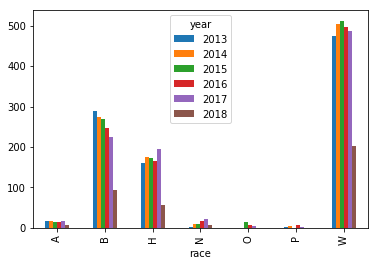

In [156]:
r = shooting.groupby(['race' , 'year'])['Age_range'].count().unstack().plot(kind = 'bar')

In [158]:
shooting.groupby(['Age_range', 'race']).Age_range.count().unstack()

race,A,B,H,N,O,P,W
Age_range,,,,,,,
13 - 19,NaN,119.0,68.0,7.0,NaN,NaN,77.0
20 - 35,85.0,815.0,535.0,43.0,25.0,10.0,1055.0
36 - 49,NaN,320.0,242.0,13.0,NaN,4.0,847.0
50 - 64,NaN,116.0,70.0,4.0,NaN,1.0,558.0
Over 65,NaN,26.0,12.0,NaN,NaN,NaN,133.0
Under 12,NaN,2.0,NaN,NaN,NaN,NaN,7.0


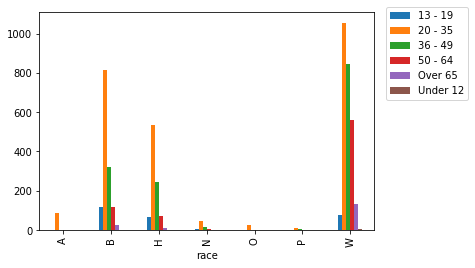

In [165]:
r = shooting.groupby([ 'race', 'Age_range']).Age_range.count().unstack().plot(kind = 'bar')
rr = plt.legend(bbox_to_anchor=(1.02, 1.05))

In [173]:
shooting.groupby([shooting.date.dt.year , 'race']).Age_range.value_counts().sort_values(ascending =False).head()

date  race  Age_range
2014  W     20 - 35      204
2015  W     20 - 35      197
2013  W     20 - 35      196
2017  W     20 - 35      195
2016  W     20 - 35      183
Name: Age_range, dtype: int64

In [174]:
shooting.groupby( 'race').Age_range.value_counts().sort_values(ascending =False).head()

race  Age_range
W     20 - 35      1055
      36 - 49       847
B     20 - 35       815
W     50 - 64       558
H     20 - 35       535
Name: Age_range, dtype: int64

In [539]:
shooting[shooting.Age_range == 'Under 12'].head()

,Unnamed: 0,name,date,manner_of_death,Armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,Age_range,daysofweek,year
830,830,Jeremy Mardis,2015-11-03,shot,unarmed,6.0,M,W,Marksville,LA,False,other,Car,True,Under 12,Tuesday,2015
1007,1007,Ciara Meyer,2016-01-11,shot,unarmed,12.0,F,W,Penn Township,PA,False,other,Not fleeing,False,Under 12,Monday,2016
2863,2863,Kameron Prescott,2017-12-21,shot,unarmed,6.0,M,W,Schertz,TX,False,other,Not fleeing,False,Under 12,Thursday,2017
3365,3365,Tamir E. Rice,2014-11-22,Gunshot,unarmed,12.0,M,B,Cleveland,OH,False,NaN,NaN,NaN,Under 12,Saturday,2014
3708,3708,Cadence Harris,2014-07-18,Gunshot,unarmed,5.0,F,W,Leavenworth,KS,False,NaN,NaN,NaN,Under 12,Friday,2014


In [187]:
shooting1 = shooting.groupby(['daysofweek','Age_range',  'race'])['body_camera'].count().unstack('race').fillna('')
shooting1.unstack('Age_range').fillna('')
#shooting1.plot()

race             A                                                B          \
Age_range  13 - 19 20 - 35 36 - 49 50 - 64 Over 65 Under 12 13 - 19 20 - 35   
daysofweek                                                                    
Friday           1     4.0     2.0       1                      9.0    57.0   
Monday                 3.0     1.0                             13.0    58.0   
Saturday         2     4.0     3.0       1                     11.0    62.0   
Sunday           1     2.0     2.0                              7.0    65.0   
Thursday         1     2.0     1.0       2                     13.0    72.0   
Tuesday                3.0     2.0       2                      7.0    60.0   
Wednesday              8.0     3.0       1                     11.0    87.0   

race                         ...          O                                W  \
Age_range  36 - 49 50 - 64   ...    36 - 49 50 - 64 Over 65 Under 12 13 - 19   
daysofweek                   ...                                               
Friday        29.0     6.0   ...          2                              4.0   
Monday        17.0    10.0   ...                                         5.0   
Saturday      23.0     8.0   ...                                        12.0   
Sunday        29.0    10.0   ...                                         8.0   
Thursday      35.0     7.0   ...          2                              9.0   
Tuesday       26.0     6.0   ...          1       2                      6.0   
Wednesday     31.0     9.0   ...          3       1                      5.0   

race                                                 
Age_range  20 - 35 36 - 49 50 - 64 Over 65 Under 12  
daysofweek                                           
Friday        93.0    71.0    56.0     3.0           
Monday        98.0    62.0    40.0    12.0        1  
Saturday      69.0    77.0    47.0     6.0           
Sunday        86.0    86.0    37.0     9.0           
Thursday      82.0    54.0    45.0    11.0           
Tuesday      109.0    78.0    55.0    12.0        1  
Wednesday     91.0    73.0    54.0    13.0           

[7 rows x 36 columns]

In [191]:
shooting.groupby(['daysofweek',  'race'])['body_camera'].count().unstack('race').fillna('')

race,A,B,H,N,O,W
daysofweek,,,,,,
Friday,8,105,78,6,5,228
Monday,4,101,68,7,4,218
Saturday,10,106,69,8,3,212
Sunday,5,112,83,9,3,226
Thursday,6,131,100,6,5,202
Tuesday,8,100,83,8,4,261
Wednesday,12,141,70,10,8,238


In [102]:
shooting.race.any(shooting.daysofweek in ['Saturday' , 'Sunday'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [166]:
weekend = shooting[(shooting.daysofweek == 'Saturday') | (shooting.daysofweek == 'Sunday')]
weekdays = shooting[~(shooting.daysofweek == 'Saturday') | (shooting.daysofweek == 'Sunday')]

In [176]:
weekdays['Armed'].value_counts(dropna = False)

armed           3942
unarmed          388
undetermined     161
Name: Armed, dtype: int64

In [175]:
weekend['Armed'].value_counts(dropna = False)

armed           1287
unarmed          122
undetermined      46
Name: Armed, dtype: int64

In [177]:
unarmed_weekend = weekend[weekend.Armed == 'unarmed']
armed_weekend = weekend[~(weekend.Armed == 'unarmed')]

In [169]:
weekend['year'] = weekend.date.dt.year
weekdays['year'] = weekdays.date.dt.year

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


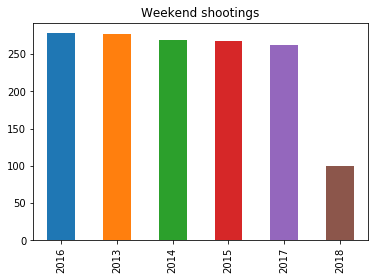

In [185]:
weekend.year.value_counts().plot(kind = 'bar')
w = plt.title('Weekend shootings')

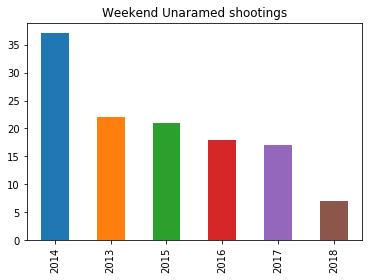

In [182]:
unarmed_weekend['year'].value_counts().plot(kind = 'bar')
u = plt.title('Weekend Unaramed shootings')

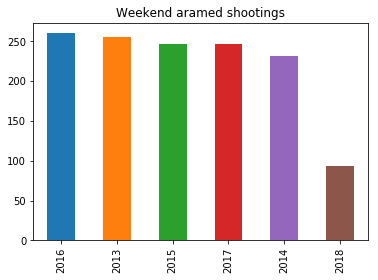

In [183]:
armed_weekend['year'].value_counts().plot(kind = 'bar')
u = plt.title('Weekend aramed shootings')

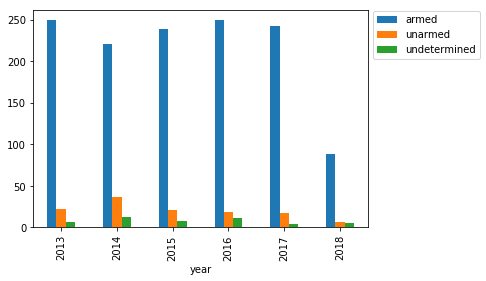

In [195]:
weekend.groupby('year')['Armed'].value_counts().unstack().plot(kind = 'bar')
rr = plt.legend(bbox_to_anchor=(1., 1.02))

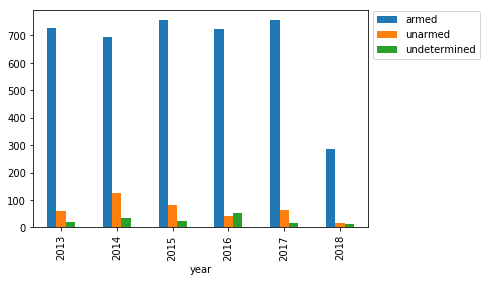

In [233]:
weekdays.groupby('year')['Armed'].value_counts().unstack().plot(kind = 'bar')
rr = plt.legend(bbox_to_anchor=(1., 1.02))

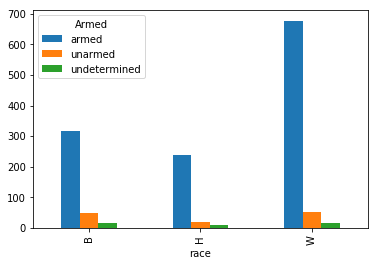

In [231]:
weekend = weekend[(weekend.race == 'B')| (weekend.race == 'W') | (weekend.race == 'H')]
w = weekend.groupby([ 'race', 'Armed'])['race'].count().unstack().plot(kind = 'bar')

In [252]:
weekend.groupby([ 'race', 'Armed'])['race'].count().unstack()

Armed,armed,unarmed,undetermined
race,,,
B,318,49,17
H,238,19,11
W,677,53,16


In [ ]:
#weekdays = weekdays[(weekend.race == 'B')| (weekend.race == 'W') | (weekend.race == 'H')]

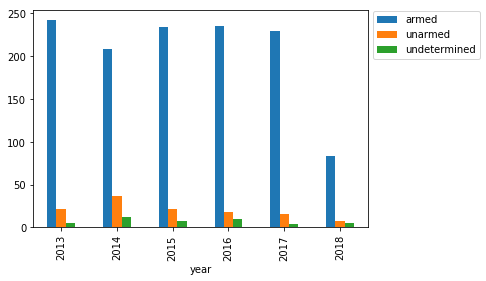

In [236]:
w = weekend.groupby(['year' , 'Armed'])['year'].count().unstack().plot(kind = 'bar')
rr = plt.legend(bbox_to_anchor=(1., 1.02))

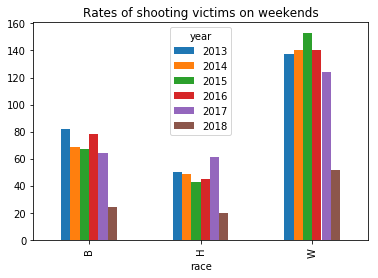

In [243]:
w = weekend.groupby(['race' , 'year'])['year'].count().unstack().plot(kind = 'bar')
l = plt.title('Rates of shooting victims on weekends')

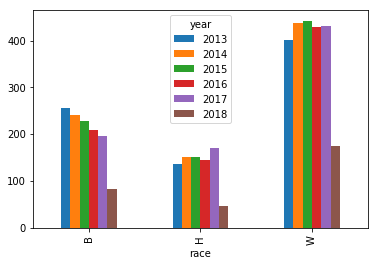

In [251]:

weekdays2 = weekdays[(weekdays.race == 'B')| (weekdays.race == 'W') | (weekdays.race == 'H')]
w2 = weekdays2.groupby(['race' , 'year'])['year'].count().unstack().plot(kind = 'bar')

In [305]:
unarmed_weekend['year'].value_counts()

2014    37
2013    22
2015    21
2016    18
2017    17
2018     7
Name: year, dtype: int64

In [306]:
unarmed_weekdays['Age_range'].value_counts()

20 - 35     210
36 - 49      90
50 - 64      38
13 - 19      35
Under 12      8
Over 65       3
Name: Age_range, dtype: int64

In [307]:
armed_weekdays['Age_range'].value_counts()

20 - 35    1941
36 - 49    1157
50 - 64     627
13 - 19     203
Over 65     147
Name: Age_range, dtype: int64

In [308]:
unarmed_weekend['Age_range'].value_counts()

20 - 35     64
36 - 49     28
13 - 19     16
50 - 64     13
Under 12     1
Name: Age_range, dtype: int64

In [309]:
unarmed_weekdays['race'].value_counts()

W    163
B    144
H     72
O      5
N      3
A      1
Name: race, dtype: int64

In [310]:
unarmed_weekend['race'].value_counts()

W    53
B    49
H    19
N     1
Name: race, dtype: int64

In [311]:
armed_weekdays['race'].value_counts()

W    2153
B    1069
H     729
A      69
N      53
O      17
P      13
Name: race, dtype: int64

In [312]:
armed_weekend['race'].value_counts()

W    693
B    335
H    249
A     28
N     19
O      6
P      3
Name: race, dtype: int64

In [87]:
unarmed_weekdays.flee.value_counts()

Not fleeing    115
Foot            40
Car             39
Other            6
Name: flee, dtype: int64

In [95]:
unarmed_weekdays_noflee['race'].value_counts()

W    49
B    38
H    21
O     4
N     1
A     1
Name: race, dtype: int64

In [96]:
unarmed_weekend_noflee['race'].value_counts()

W    15
B    11
H     4
N     1
Name: race, dtype: int64

In [97]:
armed_weekdays['race'].value_counts()

W    1290
B     618
H     445
N      43
A      42
O      24
Name: race, dtype: int64

In [98]:
armed_weekend['race'].value_counts()

W    412
B    193
H    142
N     16
A     15
O      6
Name: race, dtype: int64

In [108]:
unarmed_weekdays['body_camera' ].value_counts()

False    168
True      35
Name: body_camera, dtype: int64

In [109]:
unarmed_weekdays_flee['body_camera'].value_counts()

False    70
True     18
Name: body_camera, dtype: int64

In [110]:
armed_weekdays['body_camera'].value_counts()

False    2375
True      252
Name: body_camera, dtype: int64

In [113]:
armed_weekdays_flee['body_camera'].value_counts()

False    808
True      87
Name: body_camera, dtype: int64

In [118]:
armed_weekdays.groupby([ 'race', 'body_camera']).count()['id'].unstack()

body_camera,False,True
race,,
A,37,5
B,543,75
H,399,46
N,38,5
O,23,1
W,1182,108


In [119]:
unarmed_weekdays.groupby([ 'race', 'body_camera']).count()['id'].unstack()

body_camera,False,True
race,,
A,NaN,1.0
B,57.0,15.0
H,34.0,3.0
N,2.0,1.0
O,4.0,1.0
W,69.0,14.0


In [120]:
armed_weekend.groupby([ 'race', 'body_camera']).count()['id'].unstack()

body_camera,False,True
race,,
A,11,4
B,167,26
H,124,18
N,12,4
O,5,1
W,374,38


In [121]:
unarmed_weekend.groupby([ 'race', 'body_camera']).count()['id'].unstack()

body_camera,False,True
race,,
B,19.0,6.0
H,9.0,1.0
N,1.0,NaN
W,20.0,6.0


In [130]:
armed_weekdays[armed_weekdays.armed== 'toy weapon'].groupby(['flee', 'gender', 'race']).count()['id'].unstack()

race                  A     B     H    N     W
flee        gender                            
Car         M       NaN   1.0   1.0  NaN   6.0
Foot        M       NaN   5.0   1.0  NaN   6.0
Not fleeing F       NaN   NaN   NaN  NaN   6.0
            M       1.0  13.0  10.0  1.0  46.0
Other       M       NaN   1.0   1.0  NaN   1.0

In [131]:
armed_weekend[armed_weekend.armed== 'toy weapon'].groupby(['flee', 'gender', 'race']).count()['id'].unstack()

race                  B    H     W
flee        gender                
Car         M       NaN  NaN   1.0
Foot        M       1.0  2.0   NaN
Not fleeing F       1.0  NaN   3.0
            M       7.0  6.0  14.0
Other       M       NaN  NaN   1.0

In [151]:
shooting[shooting['age'].isnull()]['race'].value_counts(dropna = False)

NaN    11
B       9
H       7
W       5
A       1
Name: race, dtype: int64

In [156]:
shooting['race'].value_counts(dropna = False)

W      1585
B       796
H       551
NaN     196
N        54
A        53
O        32
Name: race, dtype: int64

In [251]:
white = shooting[shooting.race == 'W']

In [252]:
white.age = white['age'].fillna(round(shooting[shooting.race == 'W']['age'].mean()))

/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [332]:
shooting.groupby(['year', 'body_camera']).count()['name'].unstack()

body_camera,False,True
year,,
2015,920,74
2016,808,144
2017,854,98
2018,335,31


In [378]:
shooting['race'].value_counts()

W    2677
B    1398
H     927
A      85
N      67
O      25
P      15
Name: race, dtype: int64

In [512]:
shooting.loc[: , ['age']][shooting.race == 'B'].head()

,age
9,47.0
12,31.0
13,41.0
15,37.0
18,36.0


In [396]:
shooting['Age_range'].value_counts()

20 - 35     2568
36 - 49     1426
50 - 64      749
13 - 19      271
Over 65      171
Under 12       9
Name: Age_range, dtype: int64

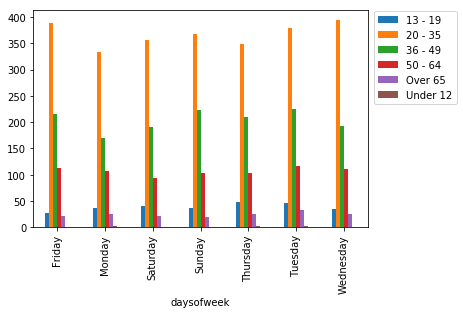

In [266]:
#plt.figure(figsize=(60,12))
#fig = plt.figure()
"""
ax = plt.subplots()
x = shooting['daysofweek']
y = shooting['Age_range']
plt.bar (x, y )
plt.show()
"""
shooting.groupby(['daysofweek' , 'Age_range'])['race'].count().unstack().plot(kind = 'bar')
l = plt.legend(loc='center right' , bbox_to_anchor=(1.28, 0.78))
#plot(shooting['daysofweek'] , )
#shooting[shooting.Age_range == '20 - 35']['daysofweek'].value_counts().plot(kind = 'bar')

In [ ]:
shooting[shooting.Age_range== '20 - 35'].groupby(['daysofweek' ])['race'].count().plot(kind = 'bar')

In [441]:
import matplotlib.pyplot as plt
y2035 = shooting[shooting.Age_range== '20 - 35'] #.groupby(['daysofweek' ])['race'].count()
y3649 = shooting[shooting.Age_range== '36 - 49'] #groupby(['daysofweek' ])['race'].count()
y5064 = shooting[shooting.Age_range== '50 - 64'].groupby(['daysofweek' ])['race'].count()
y1319 = shooting[shooting.Age_range== '13 - 19'].groupby(['daysofweek' ])['race'].count()
y65 = shooting[shooting.Age_range== 'Over 65'].groupby(['daysofweek' ])['race'].count()
y12 = shooting[shooting.Age_range== 'Under 12'].groupby(['daysofweek' ])['race'].count()
x = shooting['daysofweek']
plt.plot (x, y2035 , color = 'blue')
plt.plot(x ,  y3649 , color = 'red' )

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [442]:
shooting['Age_range'].value_counts()

20 - 35     2568
36 - 49     1426
50 - 64      749
13 - 19      271
Over 65      171
Under 12       9
Name: Age_range, dtype: int64

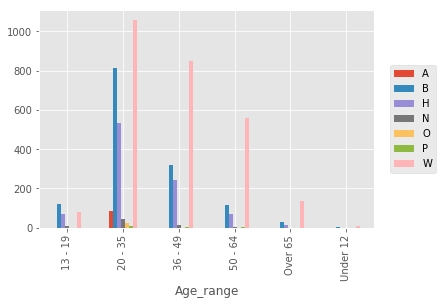

In [543]:
shooting.groupby(['Age_range', 'race'])['daysofweek'].count().unstack('race').plot(kind = 'bar')
l = plt.legend(loc='center right' , bbox_to_anchor=(1.2, 0.5))

In [449]:
shooting.head()

,name,date,manner_of_death,Armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,Age_range,daysofweek,year
0,Tim Elliot,2015-01-02,shot,armed,34.0,M,A,Shelton,WA,True,attack,Not fleeing,False,20 - 35,Friday,2015
1,Lewis Lee Lembke,2015-01-02,shot,armed,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,36 - 49,Friday,2015
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,20 - 35,Saturday,2015
3,Matthew Hoffman,2015-01-04,shot,armed,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,20 - 35,Sunday,2015
4,Michael Rodriguez,2015-01-04,shot,armed,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,36 - 49,Sunday,2015


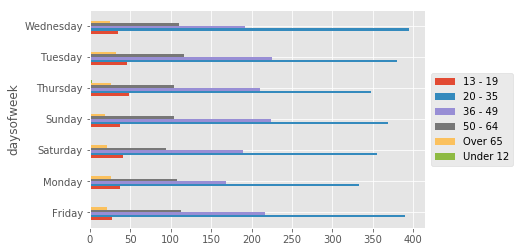

In [550]:
shooting.groupby(['daysofweek' , 'Age_range'])['gender'].count().unstack().plot(kind = 'barh')
l = plt.legend(loc='center right' , bbox_to_anchor=(1.28, 0.5))

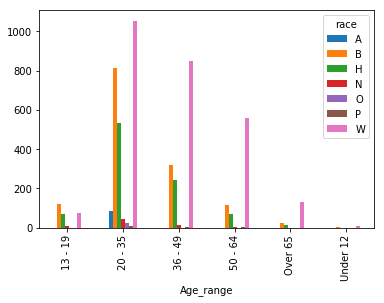

In [273]:
s = shooting.groupby(['Age_range', 'race'])['daysofweek'].count().unstack().plot(kind = 'bar')

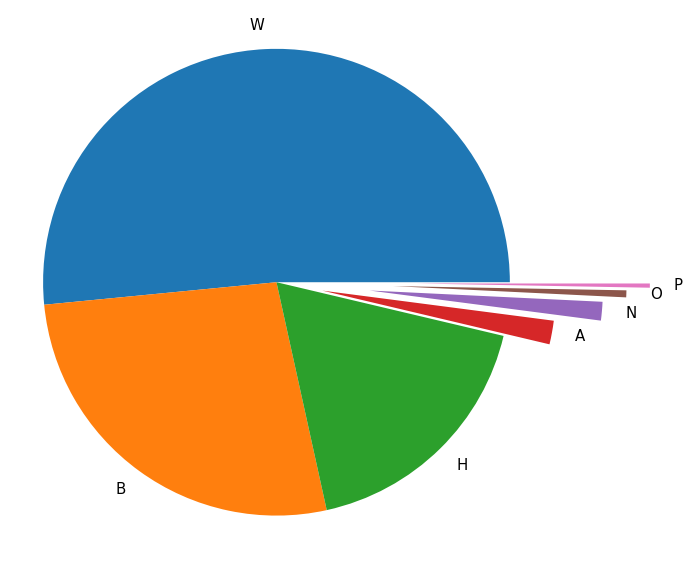

In [288]:
plt.figure(figsize=(12,10))
explode = (0, 0, 0, 0.2, 0.4, 0.5,0.6)
shooting.race.value_counts(dropna=False).plot(kind = 'pie' , explode = explode , fontsize = 15)
plt.axis('equal')
_ = plt.ylabel('')

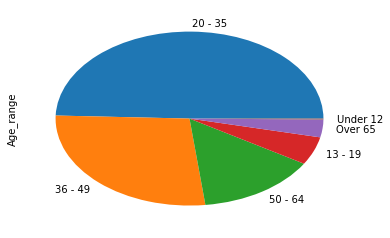

In [272]:
l = shooting['Age_range'].value_counts().plot(kind = 'pie')

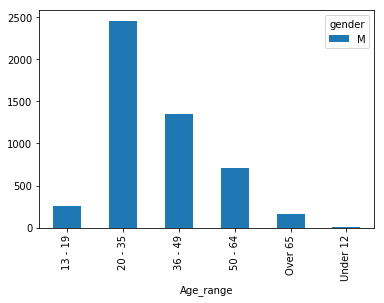

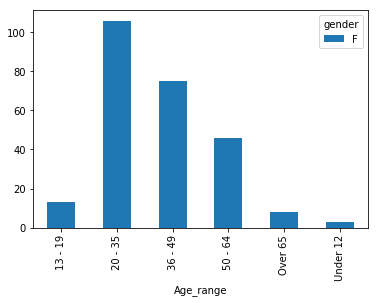

In [284]:

m = male.groupby(['Age_range', 'gender'])['race'].count().unstack().plot(kind = 'bar')

f = female.groupby(['Age_range', 'gender'])['race'].count().unstack().plot(kind = 'bar')

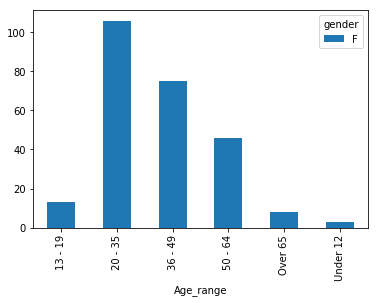

In [270]:
f = female.groupby(['Age_range', 'gender'])['race'].count().unstack().plot(kind = 'bar')

In [499]:
cellText = shooting['Age_range'].value_counts()
cellText

20 - 35     2568
36 - 49     1426
50 - 64      749
13 - 19      271
Over 65      171
Under 12       9
Name: Age_range, dtype: int64

Text(0.5,1,'Female Victims')

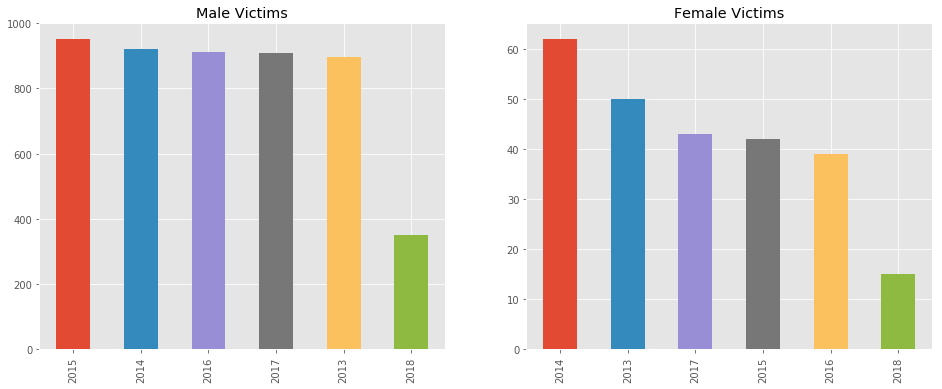

In [565]:
plt.figure(figsize=(16,6))
plt.subplot(1,2 , 1)
l = male['year'].value_counts().plot(kind = 'bar')
l.set_title('Male Victims')
plt.subplot(1,2 , 2)
ll = female['year'].value_counts().plot(kind = 'bar')
ll.set_title('Female Victims')
#female['year'].value_counts()

In [168]:
circum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 6 columns):
Unnamed: 0              29329 non-null int64
Geographic Area         29329 non-null object
City                    29329 non-null object
percent_completed_hs    29132 non-null float64
Median Income           27407 non-null float64
poverty_rate            29128 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.3+ MB


In [175]:
circum.tail()

,Unnamed: 0,Geographic Area,City,percent_completed_hs,Median Income,poverty_rate
29324,29324,WY,Chugwater town,68.0,55938.0,11.9
29325,29325,WY,Osage CDP,65.1,59924.0,4.8
29326,29326,WY,Garland CDP,64.5,51296.0,0.0
29327,29327,WY,Manville town,63.0,24063.0,23.9
29328,29328,WY,Veteran CDP,50.0,NaN,0.0


In [517]:
round(circum[['percent_completed_hs' , 'state']].groupby('state').mean(), 2).head()

,percent_completed_hs
state,
AK,84.63
AL,80.30
AR,79.95
AZ,80.47
CA,81.96


In [227]:
#d = {'state': a, 'poverty_rate_mean': []}

#df = pd.DataFrame(data=d)
df1 = pd.DataFrame(round(circum[['poverty_rate' , 'Geographic Area']].groupby('Geographic Area').mean(), 2))
df2 = pd.DataFrame(round(circum[['Median Income' , 'Geographic Area']].groupby('Geographic Area').mean(), 2))
df3 = pd.DataFrame(round(circum[['percent_completed_hs' , 'Geographic Area']].groupby('Geographic Area').mean(), 2))

In [228]:
circum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 7 columns):
Unnamed: 0              29329 non-null int64
Geographic Area         29329 non-null object
City                    29329 non-null object
percent_completed_hs    29132 non-null float64
Median Income           27407 non-null float64
poverty_rate            29128 non-null float64
Mean of finished hs     0 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.6+ MB


In [211]:
a = circum['Geographic Area'].unique()
a

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [235]:
df4 = df1.merge(df2 , how = 'inner' , on = 'Geographic Area')

In [237]:
df5 = df4.merge(df3 , how = 'inner' , on = 'Geographic Area')

In [518]:
df5.sort_values(by = 'poverty_rate' , ascending= False).head()


,poverty_rate,Median Income,percent_completed_hs
Geographic Area,,,
MS,26.88,35002.10,78.47
AZ,25.67,42495.67,80.47
GA,23.78,40127.56,79.01
NM,23.08,40952.91,80.98
AR,22.96,35593.41,79.95


In [519]:
df5.sort_values(by = 'percent_completed_hs', ascending= False).head()

,poverty_rate,Median Income,percent_completed_hs
Geographic Area,,,
MA,9.59,71765.91,92.40
WY,9.89,60874.99,92.10
HI,13.40,64676.27,91.67
UT,11.98,60216.37,91.62
CT,9.14,75149.65,91.59


In [520]:
df5.sort_values(by = 'Median Income', ascending= False).head()

,poverty_rate,Median Income,percent_completed_hs
Geographic Area,,,
NJ,8.19,80901.07,90.85
MD,10.31,79970.63,88.42
CT,9.14,75149.65,91.59
MA,9.59,71765.91,92.40
DC,18.00,70848.00,89.30


In [245]:
df5.to_csv('state_circum')

In [248]:
circum = pd.read_csv('state_circum')

In [249]:
circum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
state                   51 non-null object
poverty_rate            51 non-null float64
Median Income           51 non-null float64
percent_completed_hs    51 non-null float64
dtypes: float64(3), object(1)
memory usage: 1.7+ KB


In [250]:
shooting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5194 entries, 0 to 5193
Data columns (total 17 columns):
Unnamed: 0                 5194 non-null int64
name                       5194 non-null object
date                       5194 non-null datetime64[ns]
manner_of_death            5194 non-null object
Armed                      5194 non-null object
age                        5194 non-null float64
gender                     5193 non-null object
race                       5194 non-null object
city                       5193 non-null object
state                      5194 non-null object
signs_of_mental_illness    5193 non-null object
threat_level               3264 non-null object
flee                       3166 non-null object
body_camera                3264 non-null object
Age_range                  5194 non-null object
daysofweek                 5194 non-null object
year                       5194 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(13)
memory usa

In [252]:
#sh_merged =shooting.merge(circum , how = 'left' , on = 'state')

In [307]:
#sh_merged.to_csv('shooting 2013-2018.csv')

In [499]:
df8 = pd.DataFrame(shooting.groupby(['city' , 'state' , 'race','Median Income' , 'poverty_rate' , 'percent_completed_hs'])['year'].count().sort_values(ascending = False))
df8.reset_index(inplace= True)
df8.rename(columns = {'year' : 'no_victims'}, inplace= True)


In [549]:
df8.head(5)

,city,state,race,Median Income,poverty_rate,percent_completed_hs,no_victims
0,Chicago,IL,B,54052.71,13.88,88.48,44
1,Los Angeles,CA,H,62652.87,17.12,81.96,36
2,Phoenix,AZ,W,42495.67,25.67,80.47,35
3,Houston,TX,B,51601.09,19.92,75.69,29
4,Phoenix,AZ,H,42495.67,25.67,80.47,28


In [508]:
pd.pivot_table(df8 , index = ['city' , 'state'] ,values= 'no_victims' , columns= ['race'] , aggfunc='sum').head(5)

#pd.pivot_table(shooting , index=['Age_range' , 'daysofweek' , 'race'], values= 'signs_of_mental_illness' ,aggfunc = 'count')

,race,A,B,H,N,O,P,W
city,state,,,,,,,
300 block of State Line Road,TN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Abbeville,AL,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Aberdeen,MD,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Abilene,TX,NaN,NaN,NaN,NaN,NaN,NaN,3.0
Abingdon,MD,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [522]:
df8.to_csv('rates_by_cities')
#B_offenders

In [525]:
df8.head()

,city,state,race,Median Income,poverty_rate,percent_completed_hs,no_victims
0,Chicago,IL,B,54052.71,13.88,88.48,44
1,Los Angeles,CA,H,62652.87,17.12,81.96,36
2,Phoenix,AZ,W,42495.67,25.67,80.47,35
3,Houston,TX,B,51601.09,19.92,75.69,29
4,Phoenix,AZ,H,42495.67,25.67,80.47,28


In [607]:

B_offenders = shooting[shooting.race == 'B']['city'].value_counts().head(20)
B_offenders 

Chicago          44
Houston          29
St. Louis        27
Los Angeles      24
Columbus         24
New York         21
Baltimore        20
Washington       19
Jacksonville     18
Philadelphia     17
Oklahoma City    14
Miami            13
Indianapolis     13
Milwaukee        12
Kansas City      12
Orlando          11
Phoenix          11
Dallas           11
Charlotte        10
Oakland          10
Name: city, dtype: int64

In [608]:
W_offenders = shooting[shooting.race == 'W']['city'].value_counts().head(20)
W_offenders

Phoenix          35
Las Vegas        22
Los Angeles      17
Austin           17
Albuquerque      14
Columbus         14
Tucson           14
Dallas           14
Tulsa            13
Oklahoma City    12
Seattle          12
Kansas City      11
Springfield      11
Jacksonville     11
Spokane          10
Fort Worth       10
San Antonio      10
Mesa             10
Louisville       10
Denver           10
Name: city, dtype: int64

In [609]:
H_offenders = shooting[shooting.race == 'H']['city'].value_counts().head(20)
H_offenders

Los Angeles      36
Phoenix          28
San Antonio      19
Houston          17
Albuquerque      17
Tucson           16
Bakersfield      14
Miami            13
Fresno           12
San Jose         11
Las Vegas        11
Santa Ana        10
Denver           10
Chicago           9
Pueblo            8
San Diego         7
Las Cruces        7
Oklahoma City     7
Orlando           7
San Francisco     7
Name: city, dtype: int64

Text(0.5,1,'City with most hispanic victims')

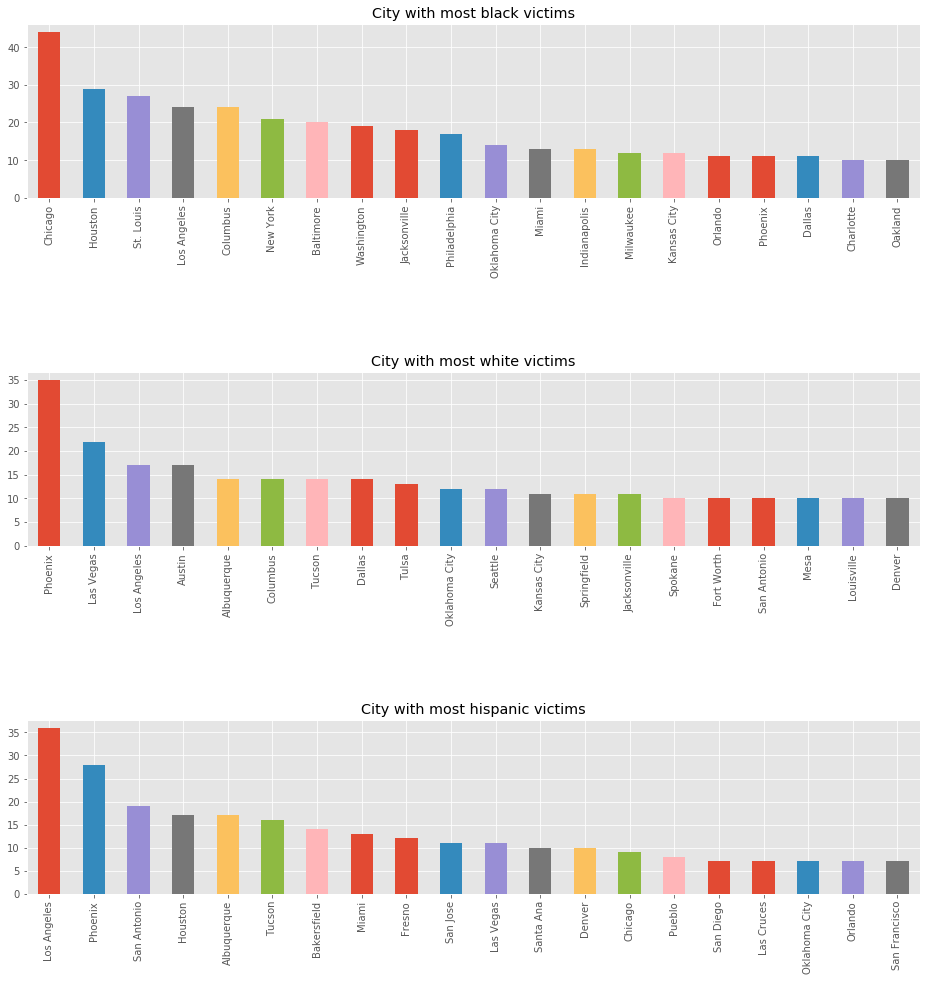

In [610]:
plt.figure(figsize=(16,16))
plt.subplot(3,1 , 1)
plt.subplots_adjust(hspace = 1)
BHC = B_offenders.plot(kind = 'bar')
BHC.set_title('City with most black victims')
plt.subplot(3, 1, 2)
WHC = W_offenders.plot(kind = 'bar')
WHC.set_title('City with most white victims')
plt.subplot(3,1 , 3)
HHC = H_offenders.plot(kind = 'bar')
HHC.set_title('City with most hispanic victims')

In [291]:
top = shooting[(shooting.race =='B' )| (shooting.race =='W' )| (shooting.race =='H' )]
top.groupby('race')['city'].value_counts().head()

race  city       
B     Chicago        44
      Houston        29
      St. Louis      27
      Columbus       24
      Los Angeles    24
Name: city, dtype: int64

In [296]:
shooting.groupby(['Median Income', 'state'])['Age_range'].value_counts().unstack().sort_values(by = 'Median Income', ascending = False).head()
                                                                    

,Age_range,13 - 19,20 - 35,36 - 49,50 - 64,Over 65,Under 12
Median Income,state,,,,,,
80901.07,NJ,3.0,33.0,23.0,9.0,1.0,NaN
79970.63,MD,10.0,41.0,23.0,7.0,2.0,NaN
75149.65,CT,1.0,10.0,1.0,9.0,1.0,NaN
71765.91,MA,1.0,20.0,19.0,2.0,NaN,NaN
70848.00,DC,2.0,12.0,4.0,2.0,NaN,NaN


In [297]:
shooting.groupby(['Median Income', 'state'])['percent_completed_hs'].count().sort_values(ascending = False).head()

Median Income  state
62652.87       CA       836
51601.09       TX       451
50262.69       FL       362
42495.67       AZ       246
40127.56       GA       157
Name: percent_completed_hs, dtype: int64

In [300]:
np.corrcoef(shooting['Median Income'] , shooting['poverty_rate'])[0,1]
#np.corrcoef


-0.739959694614469

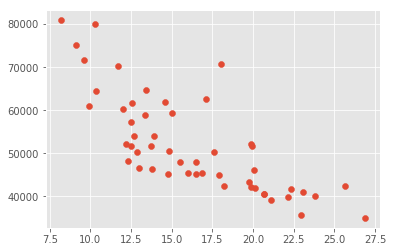

In [301]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
y = circum['Median Income']
x = circum['poverty_rate']
plt.scatter(x, y)
plt.show()

In [303]:
df7 = pd.DataFrame(shooting['state'].value_counts())
df7.reset_index(inplace = True)
df7.rename(columns = {'index' : 'state' , 'state' : 'no_victims'}, inplace= True)

In [304]:
df7.head()

,state,no_victims
0,CA,836
1,TX,451
2,FL,362
3,AZ,246
4,GA,157


In [313]:
#circum = circum.merge(df7 ,  on = 'state')

In [312]:
#circum.reset_index(inplace= True)
#circum.head()
#del circum['Unnamed: 0']
circum.to_csv('state_circum')

In [359]:
np.corrcoef(circum['Median Income'] , circum['no_victims'])[0,1]

0.0012488536029216445

In [360]:
np.corrcoef(circum['poverty_rate'] , circum['no_victims'])[0,1]

0.2442841403356657

In [361]:
np.corrcoef(circum['percent_completed_hs'] , circum['no_victims'])[0,1]

-0.43544061182045607

In [350]:
circum.head()

,state,poverty_rate,Median Income,percent_completed_hs,no_victims
0,AK,19.85,52099.59,84.63,28
1,AL,20.65,40577.31,80.30,106
2,AR,22.96,35593.41,79.95,58
3,AZ,25.67,42495.67,80.47,246
4,CA,17.12,62652.87,81.96,836


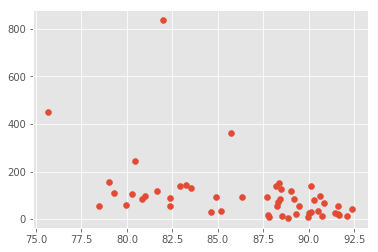

In [368]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
y = circum.no_victims
x = circum.percent_completed_hs
plt.scatter(x, y)
plt.show()

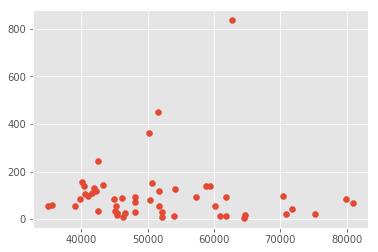

In [367]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
y = circum.no_victims
x = circum['Median Income']
plt.scatter(x, y)
plt.show()

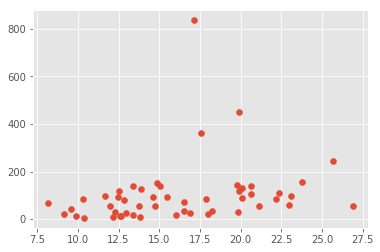

In [373]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
y = circum.no_victims
x = circum['poverty_rate']
plt.scatter(x, y)
plt.show()

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
y = circum.no_victims
x = circum['poverty_rate']
plt.scatter(x, y)
plt.show()

In [680]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

In [733]:
# Import libraries
import pandas as pd
import folium
import requests


state_geo = pd.read_json('states.json')


# Initialize the map:
m = folium.Map(location=[39, -97], zoom_start=4.5)

m.choropleth(geo_path='states.json', data=circum,
             columns=['state', 'no_victims'],
             key_on='feature.id',
             fill_color='PuRd', fill_opacity=0.8, line_opacity=0.2,
             threshold_scale = [0 ,50 , 200 , 400 , 600 , 844],
             legend_name='Demographic Distribution')

folium.LayerControl().add_to(m)
#m.save('police-shooting.html')


m

In [686]:
top1_off_cities = pd.read_csv('top1_off_cities.csv')

In [734]:

import folium
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot') 

# Make an empty map
#m = folium.Map(location=[39, -97], zoom_start=4)

"""
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)


"""
# Add marker one by one on the map
for i in range(0,len(top1_off_cities)):
    folium.CircleMarker(
      location=[top1_off_cities.iloc[i]['LAT'] , top1_off_cities.iloc[i]['LON'] * -1],
      popup=top1_off_cities.iloc[i]['city'],
      radius=top1_off_cities.iloc[i]['total']*1000,
      fill_opacity=0.56,
      color='black',
      fill_color='purple').add_to(m)
 




In [735]:
m

In [760]:
# Import libraries
import pandas as pd
import folium
import requests


state_geo = pd.read_json('states.json')


# Initialize the map:
m = folium.Map(location=[39, -97], zoom_start=4.5)

m.choropleth(geo_path='states.json', data=circum,
             columns=['state', 'no_victims'],
             key_on='feature.id',
             fill_color='PuRd', fill_opacity=0.8, line_opacity=0.2,
             threshold_scale = [0 ,50 , 200 , 400 , 600 , 844],
             legend_name='Demographic Distribution')

folium.LayerControl().add_to(m)
#m.save('police-shooting.html')


m

In [761]:

import folium
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot') 


Black_city_Top_off = pd.read_csv('Black_city_Top_off.csv')

# Add marker one by one on the map
for i in range(0,len(Black_city_Top_off)):
    folium.CircleMarker(
      location=[Black_city_Top_off.iloc[i]['LAT'] , Black_city_Top_off.iloc[i]['LON'] * -1],
      popup=Black_city_Top_off.iloc[i]['city'],
      radius=Black_city_Top_off.iloc[i]['B']*1500,
      fill_opacity=0.7,
      color='black',
      fill_color='crimson').add_to(m)
m

In [762]:
# Import libraries
import pandas as pd
import folium
import requests


state_geo = pd.read_json('states.json')


# Initialize the map:
m = folium.Map(location=[39, -97], zoom_start=4.5)

m.choropleth(geo_path='states.json', data=circum,
             columns=['state', 'no_victims'],
             key_on='feature.id',
             fill_color='PuRd', fill_opacity=0.8, line_opacity=0.2,
             threshold_scale = [0 ,50 , 200 , 400 , 600 , 844],
             legend_name='Demographic Distribution')

folium.LayerControl().add_to(m)
#m.save('police-shooting.html')


m

In [763]:

import folium
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot') 


White_city_Top_off = pd.read_csv('White_city_Top_off.csv')

# Add marker one by one on the map
for i in range(0,len(White_city_Top_off)):
    folium.CircleMarker(
      location=[White_city_Top_off.iloc[i]['LAT'] , White_city_Top_off.iloc[i]['LON'] * -1],
      popup=White_city_Top_off.iloc[i]['city'],
      radius=White_city_Top_off.iloc[i]['W']*1500,
      color = 'white',
      fill_opacity=0.7,
      fill_color='blue').add_to(m)
m

In [764]:
# Import libraries
import pandas as pd
import folium
import requests


state_geo = pd.read_json('states.json')


# Initialize the map:
m = folium.Map(location=[39, -97], zoom_start=4.5)

m.choropleth(geo_path='states.json', data=circum,
             columns=['state', 'no_victims'],
             key_on='feature.id',
             fill_color='PuRd', fill_opacity=0.8, line_opacity=0.2,
             threshold_scale = [0 ,50 , 200 , 400 , 600 , 844],
             legend_name='Demographic Distribution')

folium.LayerControl().add_to(m)
#m.save('police-shooting.html')


m

In [765]:
import folium
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot') 


Hispanic_city_Top_off = pd.read_csv('Hispanic_city_Top_off.csv')

# Add marker one by one on the map
for i in range(0,len(Hispanic_city_Top_off)):
    folium.CircleMarker(
      location=[Hispanic_city_Top_off.iloc[i]['LAT'] , Hispanic_city_Top_off.iloc[i]['LON'] * -1],
      popup=Hispanic_city_Top_off.iloc[i]['city'],
      radius=Hispanic_city_Top_off.iloc[i]['H']*1500,
      color = 'white',
      fill_opacity=0.75,
      fill_color='green').add_to(m)
m

In [364]:
#top_off_cities = pd.read_csv('top_off_cities.csv')

In [751]:
top1_off_cities[top1_off_cities.city == 'Omaha']

,city,state,B,H,W,total,LON,LAT,percent_completed_hs,Median Income,poverty_rate
34,Omaha,NE,4.0,1.0,9.0,14,95.9,41.3,88.0,49896,16.7


In [753]:
circum.sort_values(by = 'no_victims').head(10)

,state,poverty_rate,Median Income,percent_completed_hs,no_victims
39,RI,10.37,64537.54,88.83,5
46,VT,13.79,46284.78,89.98,8
28,ND,12.16,52141.71,87.82,9
30,NH,12.66,54026.32,90.71,12
8,DE,12.56,61792.41,88.52,14
50,WY,9.89,60874.99,92.10,15
41,SD,16.03,45408.26,87.75,16
11,HI,13.40,64676.27,91.67,16
7,DC,18.00,70848.00,89.30,20
6,CT,9.14,75149.65,91.59,22


In [700]:
state_geo.head()

,type,features
0,FeatureCollection,"{'type': 'Feature', 'id': 'AL', 'properties': ..."
1,FeatureCollection,"{'type': 'Feature', 'id': 'AK', 'properties': ..."
2,FeatureCollection,"{'type': 'Feature', 'id': 'AZ', 'properties': ..."
3,FeatureCollection,"{'type': 'Feature', 'id': 'AR', 'properties': ..."
4,FeatureCollection,"{'type': 'Feature', 'id': 'CA', 'properties': ..."


In [611]:
top = shooting[(shooting.race =='B' )| (shooting.race =='W' )| (shooting.race =='H' )]

In [697]:

#B1_City_top_off = top.groupby('race')['city'].value_counts().unstack().transpose().sort_values(by = 'B' , ascending = False).head(20)
B1_City_top_off =top.groupby(['city' , 'state'])['race'].value_counts().unstack().sort_values(by = 'B' , ascending = False).head(20)
B1_City_top_off.to_csv('Black_city_Top_off.csv', index= True)

In [698]:
W1_City_top_off = top.groupby(['city' , 'state'])['race'].value_counts().unstack().sort_values(by = 'W' , ascending = False).head(20)
W1_City_top_off.to_csv('White_city_Top_off.csv' , index= True)

In [699]:
H1_City_top_off = top.groupby(['city' , 'state'])['race'].value_counts().unstack().sort_values(by = 'H' , ascending = False).head(20)
H1_City_top_off.to_csv('Hispanic_city_Top_off.csv' , index= True)

In [630]:
top1_off_cities = pd.concat([B1_City_top_off , W1_City_top_off , H1_City_top_off])
top1_off_cities.drop_duplicates(inplace= True)
top1_off_cities['total'] = top_off_cities.sum(axis = 1)
top1_off_cities.sort_values(by = 'total' , inplace= True , ascending= True)

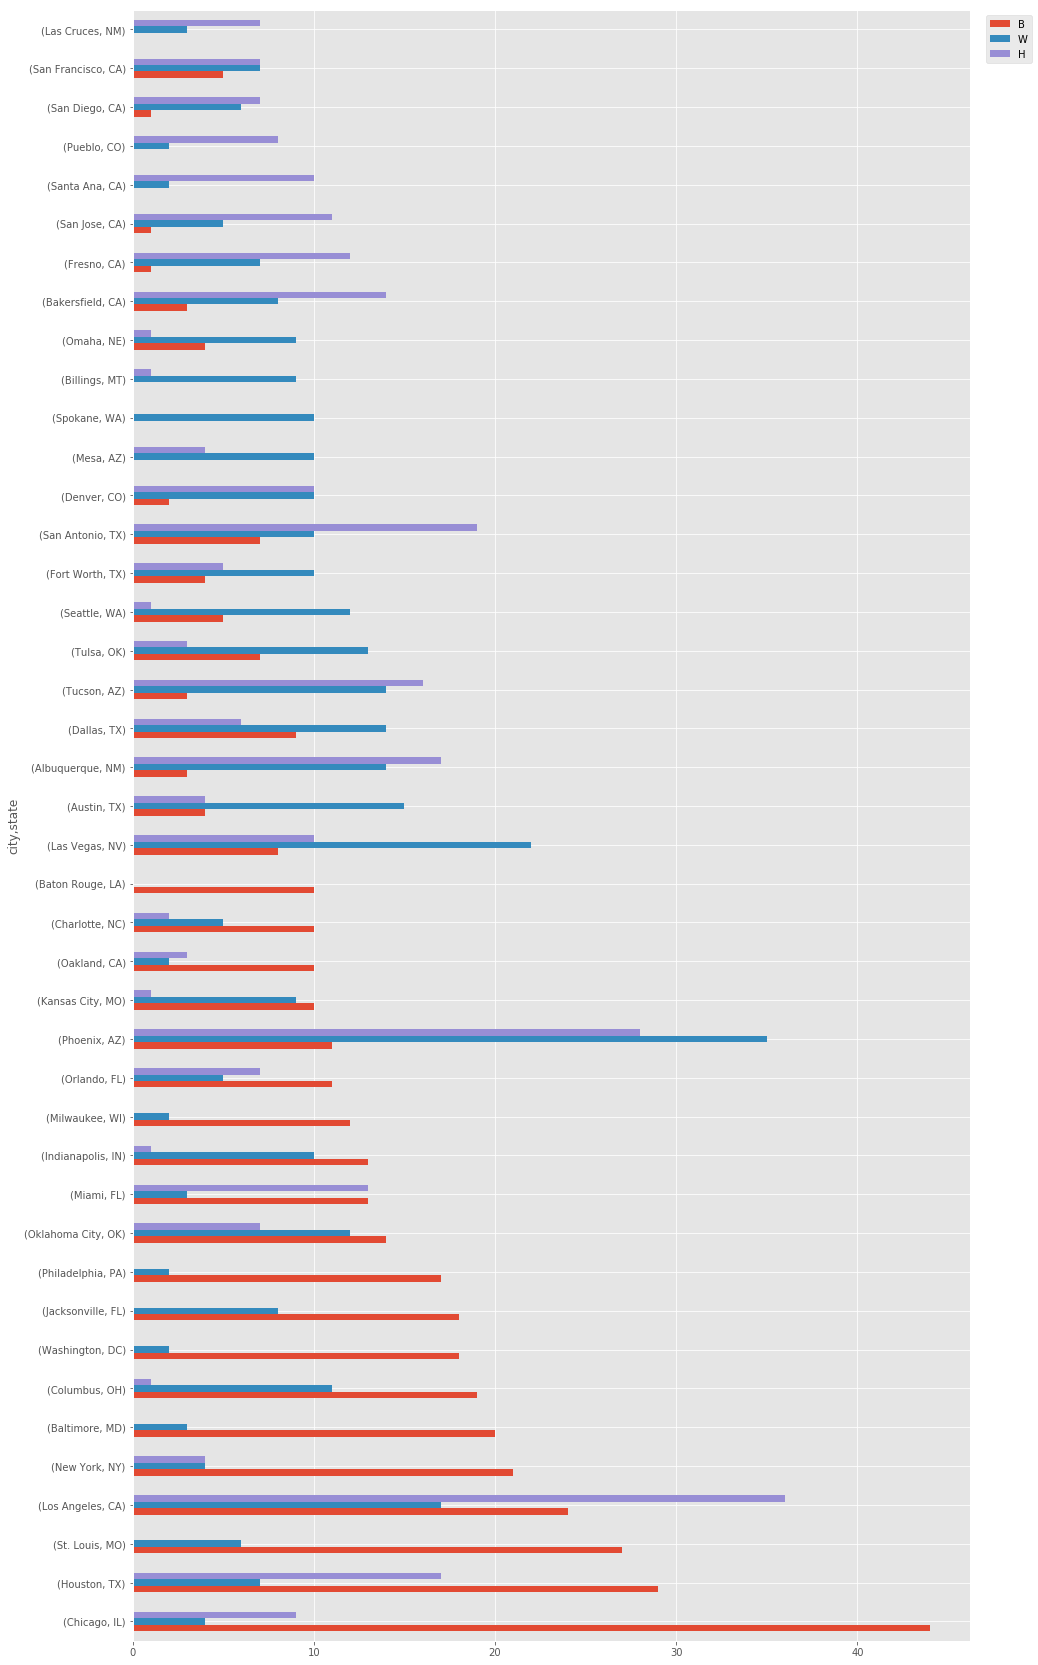

In [631]:
top1_off_cities[['B' , 'W' , 'H']].plot(kind = 'barh', figsize=(15, 30))
plt.legend(loc='upper right' , bbox_to_anchor=(1.08, 1))

In [640]:
top1_off_cities.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 42 entries, (Chicago, IL) to (Las Cruces, NM)
Data columns (total 4 columns):
B        36 non-null float64
H        34 non-null float64
W        41 non-null float64
total    0 non-null float64
dtypes: float64(4)
memory usage: 2.0+ KB


In [1018]:
# LAT
top_off_cities.iloc[5 ,6] =33.41


In [1019]:
#top_off_cities.loc[top_off_cities.city =='Spokane', 'LON'] = 117.53
top_off_cities.iloc[5 ,5] =111.83

In [659]:
top1_off_cities.head()

,race,B,H,W,total
city,state,,,,
Chicago,IL,44.0,9.0,4.0,57.0
Houston,TX,29.0,17.0,7.0,53.0
St. Louis,MO,27.0,NaN,6.0,33.0
Los Angeles,CA,24.0,36.0,17.0,77.0
New York,NY,21.0,4.0,4.0,29.0


In [658]:
top1_off_cities['total'] = top1_off_cities[['B' , 'H' , 'W']].sum(axis = 1)

In [669]:
top1_off_cities.drop_duplicates(inplace=True)

In [670]:
top1_off_cities.to_csv('top1_off_cities.csv' , index= True )

In [672]:
B_state_off = top.groupby('race')['state'].value_counts().unstack().transpose().sort_values(by = 'B' , ascending = False).head(10)
B_state_off

race,B,H,W
state,,,
CA,147.0,357.0,285.0
FL,126.0,45.0,186.0
TX,103.0,140.0,198.0
IL,71.0,16.0,40.0
GA,65.0,8.0,82.0
OH,60.0,1.0,88.0
NC,59.0,6.0,77.0
LA,57.0,4.0,44.0
MO,53.0,3.0,74.0


In [673]:
W_state_off = top.groupby('race')['state'].value_counts().unstack().transpose().sort_values(by = 'W' , ascending = False).head(10)
W_state_off

race,B,H,W
state,,,
CA,147.0,357.0,285.0
TX,103.0,140.0,198.0
FL,126.0,45.0,186.0
AZ,24.0,84.0,130.0
WA,18.0,18.0,89.0
OH,60.0,1.0,88.0
TN,26.0,2.0,87.0
OK,37.0,13.0,82.0
GA,65.0,8.0,82.0


In [674]:
H_state_off = top.groupby('race')['state'].value_counts().unstack().transpose().sort_values(by = 'H' , ascending = False).head(10)
H_state_off

race,B,H,W
state,,,
CA,147.0,357.0,285.0
TX,103.0,140.0,198.0
AZ,24.0,84.0,130.0
NM,4.0,56.0,35.0
CO,16.0,46.0,67.0
FL,126.0,45.0,186.0
NV,14.0,20.0,53.0
WA,18.0,18.0,89.0
IL,71.0,16.0,40.0


In [675]:
top_off_state = pd.concat([B_state_off , W_state_off , H_state_off])
top_off_state.drop_duplicates(inplace=True)
top_off_state['total']=top_off_state.sum(axis=1)
top_off_state.sort_values(by = 'total' , inplace= True , ascending= False)

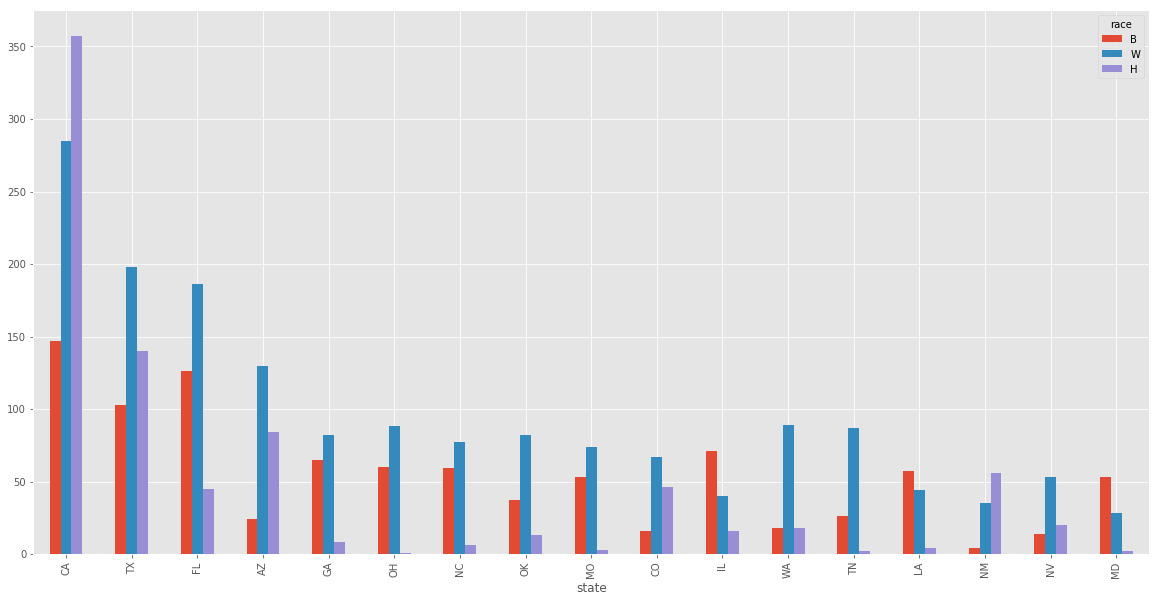

In [676]:
#plt.figure(figsize=(20, 10))
l = top_off_state[['B' , 'W' , 'H']].plot(kind = 'bar',figsize=(20, 10) )

In [678]:
shooting['state'].value_counts().head(30)

CA    836
TX    451
FL    362
AZ    246
GA    157
OH    153
NC    144
OK    140
WA    139
CO    138
MO    131
IL    128
PA    118
TN    117
LA    108
AL    106
NM     99
NY     99
VA     94
NV     91
IN     91
KY     87
SC     85
MI     84
MD     83
WI     81
OR     74
NJ     69
AR     58
MS     56
Name: state, dtype: int64

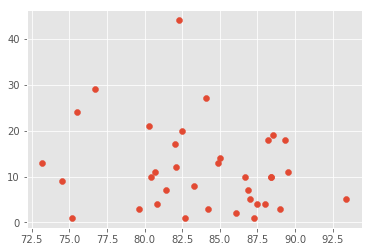

In [736]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
y = top1_off_cities.B
x = top1_off_cities.percent_completed_hs
plt.scatter(x, y)
plt.show()

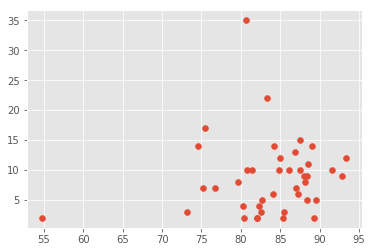

In [737]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
y = top1_off_cities.W
x = top1_off_cities.percent_completed_hs
plt.scatter(x, y)
plt.show()

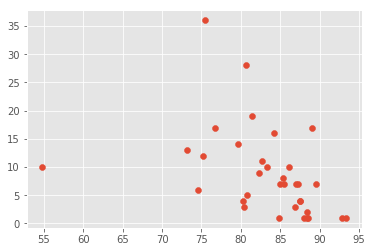

In [738]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
y = top1_off_cities.H
x = top1_off_cities.percent_completed_hs
plt.scatter(x, y)
plt.show()

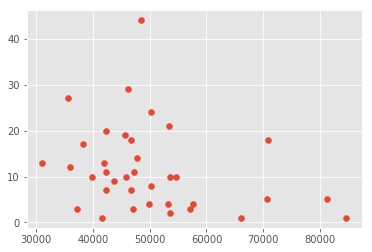

In [740]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
y = top1_off_cities.B
x = top1_off_cities['Median Income']
plt.scatter(x, y)
plt.show()

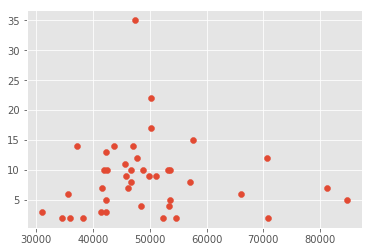

In [741]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
y = top1_off_cities.W
x = top1_off_cities['Median Income']
plt.scatter(x, y)
plt.show()

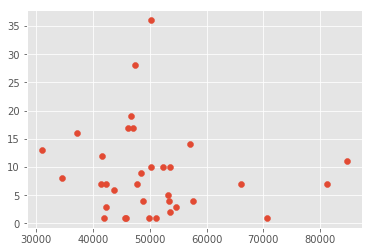

In [742]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
y = top1_off_cities.H
x = top1_off_cities['Median Income']
plt.scatter(x, y)
plt.show()

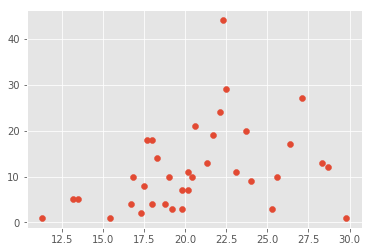

In [743]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
y = top1_off_cities.B
x = top1_off_cities['poverty_rate']
plt.scatter(x, y)
plt.show()

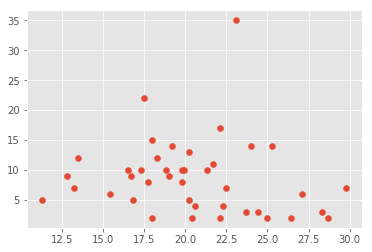

In [744]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
y = top1_off_cities.W
x = top1_off_cities['poverty_rate']
plt.scatter(x, y)
plt.show()

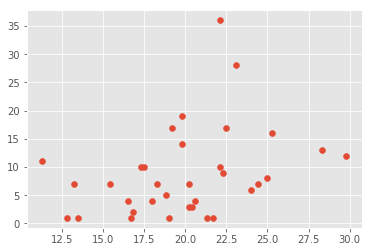

In [745]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
y = top1_off_cities.H
x = top1_off_cities['poverty_rate']
plt.scatter(x, y)
plt.show()

In [739]:
top1_off_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 11 columns):
city                    42 non-null object
state                   42 non-null object
B                       36 non-null float64
H                       34 non-null float64
W                       41 non-null float64
total                   42 non-null int64
LON                     42 non-null float64
LAT                     42 non-null float64
percent_completed_hs    42 non-null float64
Median Income           42 non-null int64
poverty_rate            42 non-null float64
dtypes: float64(7), int64(2), object(2)
memory usage: 3.7+ KB
